In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import netwulf as nw
from scipy.optimize import minimize
import scipy as scp

In [2]:
#given "points" with labels a and b we can assign probability of an edge between them
def basic_func(a,b):
    if a == b:
        return .8
    else:
        return .2

def basic_func2(a,b):
    if a == 1 and b == 1:
        return .8
    if a == 0 and b == 0:
        return .6
    else:
        return .2
def basic_func3(a,b):
    if a == b:
        return .01
    return np.abs(a-b)
def basic_func4(a,b):
    if a == b:
        return .01
    return (a-b)**2


    
def create_graph(num_nodes, labels, func):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i, group=labels[i])
        for j in range(i):
            if func(labels[i], labels[j]) != func(labels[j],labels[i]):
                print("WARNING, asymetric function")
            if np.random.rand() < func(labels[i], labels[j]):
                G.add_edge(i, j)
    return G
def create_transition_matrix(labels, func):
    matrix = []
    for i in range(len(labels)):
        arr = []
        for j in range(len(labels)):
            if func(labels[i], labels[j]) != func(labels[j],labels[i]):
                print("WARNING, asymetric function")
            arr.append(func(labels[i], labels[j]))
        matrix.append(arr)
    return np.array(matrix)

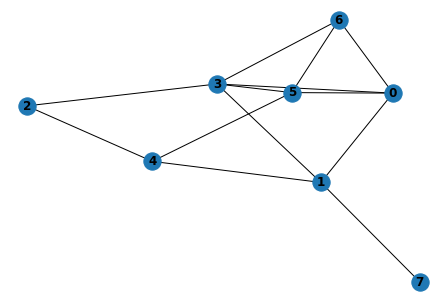

In [3]:
n = 8
G = create_graph(n, np.random.randint(2,size=8), basic_func)
nx.draw(G, with_labels=True, font_weight='bold')

In [4]:
nx.to_numpy_array(G)

array([[0., 1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [5]:
#input is a numpy array of labels
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
     return np.exp(x) / np.square(1 + np.exp(x))
def fit_matrix(labels):
    array = labels.T @ labels
    return sigmoid(array)
def matrix_log_likelihood(sample,X):
    sample_complement= 1-sample - np.identity(sample.shape[0])
    return np.sum(np.multiply(sample, np.log(X)) + np.multiply(sample_complement, np.log(1-X)))/sample.shape[0]**2
def log_likelihood(sample,labels):
    sample_complement= 1-sample - np.identity(sample.shape[0])
    #print("sample",sample)
    #print("compliment",sample_complement)
    X = fit_matrix(labels)
    #print(X)
    log_errs = np.multiply(sample, np.log(X)) + np.multiply(sample_complement, np.log(1-X))
    #print(log_errs)
    return np.sum(log_errs)/sample.shape[0]**2

In [6]:
def inv_sigmoid(x):
    return np.log(x/(1-x))

In [7]:
inv_sigmoid(.999)

6.906754778648553

In [8]:
fit_matrix(np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]]))

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [9]:
fit_matrix(np.array([[0,.1,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]]))

array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.50249998, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ]])

In [6]:
s = np.array([[0.73105858, 0.11920292, 0.73105858, 0.01798621],
       [0.11920292, 0.98201379, 0.11920292, 0.99966465],
       [0.73105858, 0.11920292, 0.73105858, 0.01798621],
       [0.01798621, 0.99966465, 0.01798621, 0.99999989]])
M = nx.to_numpy_array(G)

log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))

-0.6258823613323983

In [7]:
fit_matrix(np.array([[-1,2,-1,4]]))

array([[0.73105858, 0.11920292, 0.73105858, 0.01798621],
       [0.11920292, 0.98201379, 0.11920292, 0.99966465],
       [0.73105858, 0.11920292, 0.73105858, 0.01798621],
       [0.01798621, 0.99966465, 0.01798621, 0.99999989]])

In [8]:
np.array([[1,2,3,4]]).T *np.array([[1,2,3,4]]) + np.array([[1,1,1,1]]).T *np.array([[1,1,1,1]])

array([[ 2,  3,  4,  5],
       [ 3,  5,  7,  9],
       [ 4,  7, 10, 13],
       [ 5,  9, 13, 17]])

In [9]:
(np.array([[1,2,3,4],[1,1,1,1]])).T @ np.array([[1,2,3,4],[1,1,1,1]])

array([[ 2,  3,  4,  5],
       [ 3,  5,  7,  9],
       [ 4,  7, 10, 13],
       [ 5,  9, 13, 17]])

In [8]:
def derivative(row, sample, labels):
    sample_complement= 1-sample - np.identity(sample.shape[0])
    #print("sample",sample)
    #print("compliment",sample_complement)
    X = fit_matrix(labels)
    X_prime = sigmoid_prime(labels.T@labels)
    #print("mins",np.min(X), np.min(X_prime))
    #print("X",X)
    #print("1-X", 1-X)
    
    
    #sample_errs= np.divide(X_prime,X)* labels[[row]].T[:None]
    sample_errs= (1-X)* labels[[row]].T[:None]
    #print("sample errors")
    #print(sample_errs)
    
    #complement_errs = -np.divide(X_prime,1-X)* labels[[row]].T[:None]
    complement_errs = -X* labels[[row]].T[:None]
    deriv_errs = np.multiply(sample, sample_errs) + np.multiply(sample_complement, complement_errs)
    #print(deriv_errs)
    return 2*np.sum(deriv_errs, axis=0)/sample.shape[0]**2

In [9]:
def all_derivative(sample,labels):
    derivatives = []
    for row in range(labels.shape[0]):
        derivatives.append(derivative(row,sample,labels))
    return np.array(derivatives)

In [10]:
def orthogonal_loss(labels):
    n = len(labels[0])
    m = labels@labels.T
    np.fill_diagonal(m,0)
    return np.linalg.norm(m,'fro')**2/n**2

In [11]:
test_labels = np.array([[1,2,3,3,3],[1,1,1,1,1]])
test_deviation = np.array([[1,2,3,3,3],[1,1,1,1.001,1]])

In [12]:
(orthogonal_loss(test_deviation)-orthogonal_loss(test_labels))/.001

5.760720000003161

In [396]:
all_orthogonal_derivatives(test_labels)

array([[1.92, 1.92, 1.92, 1.92, 1.92],
       [1.92, 3.84, 5.76, 5.76, 5.76]])

In [328]:
np.fill_diagonal(label@label.T,0)

In [329]:
orthogonal_loss(label)

0.2431281841405965

In [13]:
def orthogonal_derivative(row, labels):
    n = len(labels[0])
    m = labels@labels.T
    np.fill_diagonal(m,0)
    return (m[[row]]@labels)[0]*4/n**2
def all_orthogonal_derivatives(labels):
    derivatives = []
    for row in range(labels.shape[0]):
        derivatives.append(orthogonal_derivative(row,labels))
    return np.array(derivatives)

In [14]:
all_orthogonal_derivatives(label).shape

NameError: name 'label' is not defined

In [85]:
all_derivative(M, np.array([[0,0,1,1,0,0,0,0], [0,0,1,0,0,1,1,0]]))

array([[ 0.        ,  0.03125   ,  0.00840442,  0.00840442,  0.        ,
        -0.00722058,  0.02402942, -0.03125   ],
       [-0.015625  , -0.015625  ,  0.01680884,  0.00840442, -0.015625  ,
        -0.01444116, -0.01444116, -0.015625  ]])

In [133]:
all_derivative(M, np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]]))

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [134]:
(log_likelihood(M, np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.001,0]]))- log_likelihood(M, np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]])))/.001

0.0

In [34]:
(log_likelihood(M, np.array([[0,0,1,1,0,0,0,0], [0,0,1,0,0,1,1.001,0]]))- log_likelihood(M, np.array([[0,0,1,1,0,0,0,0], [0,0,1,0,0,1,1,0]])))/.001

-0.92462747780786

In [159]:
np.random.logistic(size=10).reshape(2,5)

array([[ 5.04189211e-01,  3.90886109e-01,  8.10961894e-01,
        -4.06587353e+00,  6.48083050e-01],
       [ 1.28830173e+00,  4.00941785e-03,  1.00034903e+00,
         2.32496980e-01, -1.14597684e+00]])

In [15]:
def grad_descent(M, num_labels = 2, step_size = lambda x: 1, num_steps = 1000):
    n = len(M)
    #initialize labels
    cur_labels = np.random.logistic(size=num_labels*n).reshape(num_labels,n)
    for i in range(num_steps):
        deriv = all_derivative(M, cur_labels)
        if np.isnan(deriv).any():
            #print("maydayyyyyy")
            print(repr(cur_labels))
            return
        #deriv = deriv / deriv.sum(axis=1, keepdims=True)
        cur_labels += deriv*step_size(i)
        cur_labels = np.clip(cur_labels,-6,6)
        print(i, log_likelihood(M,cur_labels))
    return cur_labels
        

In [16]:
def prupe_descent(M, num_labels = 2, step_size = lambda x: 1, num_steps = 1000):
    n = len(M)
    #initialize labels
    #cur_labels = np.random.logistic(size=num_labels*n).reshape(num_labels,n)
    cur_labels = np.ones(shape= (num_labels,n))
    for L in range(10):
        for row in range(num_labels):
            for i in range(num_steps):
                deriv = derivative(row,M, cur_labels)
                if np.isnan(deriv).any():
                    #print("maydayyyyyy")
                    print(repr(cur_labels))
                    return
                #deriv = deriv / deriv.sum(axis=1, keepdims=True)
                cur_labels[row] += deriv*step_size(i)
                cur_labels = np.clip(cur_labels,-6,6)
                print(i, log_likelihood(M,cur_labels))
    return cur_labels

In [17]:
def prupe_descent(M, num_labels = 2, step_size = lambda x: 1, num_steps = 1000, init=None):
    n = len(M)
    #initialize labels
    #cur_labels = np.random.logistic(size=num_labels*n).reshape(num_labels,n)
    if init is None:
        cur_labels = np.ones(shape= (num_labels,n))
    else: 
        cur_labels = init
    for L in range(10):
        for row in range(num_labels):
            for i in range(num_steps):
                deriv = derivative(row,M, cur_labels)
                if np.isnan(deriv).any():
                    #print("maydayyyyyy")
                    print(repr(cur_labels))
                    return
                #deriv = deriv / deriv.sum(axis=1, keepdims=True)
                cur_labels[row] += deriv*step_size(i)
                cur_labels = np.clip(cur_labels,-6,6)
                print(i, log_likelihood(M,cur_labels))
    return cur_labels

In [18]:
np.zeros(shape=(3,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
def projection_derivative(A, X):
    A_complement= 1-A - np.identity(A.shape[0])
    derivs = np.multiply(A, sigmoid(-X)) + np.multiply(A_complement, -sigmoid(X))
    return derivs

In [175]:
def projection_descent(A, step_size=.01, steps =100, params = 2):
    n = len(A)
    cur_matrix = np.zeros(shape=A.shape)
    #print(cur_matrix.shape)
    for i in range(steps):
        for j in range(100):
            #print(projection_derivative(A, cur_matrix).shape)
            derivs = projection_derivative(A, cur_matrix)
            cur_matrix += derivs*step_size
        vals, vecs = scp.linalg.eig(cur_matrix)

        D = np.zeros(shape=(A.shape), dtype=float)
        D[:params, :params] = np.diag(vals.real)[:params,:params]
        cur_matrix = vecs@ D @vecs.T
        #print(cur_matrix.shape)
        print(i, matrix_log_likelihood(A, sigmoid(cur_matrix)))
    return cur_matrix

In [89]:
output = projection_descent(A, step_size=.01, steps=20)

<ipython-input-86-42912169b5ff>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  D[:2, :2] = np.diag(vals)[:2,:2]


0 -0.6387099861649563
1 -0.6057614000523331
2 -0.5852267873327567
3 -0.5721802690373792
4 -0.5637356487440294
5 -0.558177907168899
6 -0.5544671437144763
7 -0.5519591978284766
8 -0.5502468453686483
9 -0.5490678424521397
10 -0.5482505135267086
11 -0.5476808436261982
12 -0.5472821581060829
13 -0.5470023320304986
14 -0.5468055977066366
15 -0.5466672146017929
16 -0.5465699527331549
17 -0.546501743494909
18 -0.5464540929592137
19 -0.546420999672775


In [92]:
matrix_log_likelihood(A, T)

-0.5484259757082868

In [91]:
sigmoid(output)

array([[0.84915566, 0.21636763, 0.8529001 , ..., 0.81130223, 0.21988103,
        0.24718013],
       [0.21636763, 0.64491734, 0.20924216, ..., 0.23986031, 0.61507954,
        0.61205165],
       [0.8529001 , 0.20924216, 0.85648599, ..., 0.81451334, 0.21166026,
        0.23976734],
       ...,
       [0.81130223, 0.23986031, 0.81451334, ..., 0.77180668, 0.23921334,
        0.26709635],
       [0.21988103, 0.61507954, 0.21166026, ..., 0.23921334, 0.57585533,
        0.58085357],
       [0.24718013, 0.61205165, 0.23976734, ..., 0.26709635, 0.58085357,
        0.5822711 ]])

In [59]:
vals, vecs = scp.linalg.eigh(A, subset_by_index=[n-2,n-1])
        
D = np.zeros(shape=(2,2), dtype=float)
D[:2, :2] = np.diag(vals)[:2,:2]
matrix_log_likelihood(A, vecs@ D @ vecs.T)

-0.5464074658411551

In [84]:
vals, vecs = scp.linalg.eig(inv_sigmoid(T))
        
D = np.zeros(shape=(A.shape), dtype=float)
D[:2, :2] = np.diag(vals)[:2,:2]
matrix_log_likelihood(A, sigmoid(vecs@ D @ vecs.T))

<ipython-input-84-087548bdf8d6>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  D[:2, :2] = np.diag(vals)[:2,:2]


(-0.548425975708287+0j)

In [83]:
vecs

array([[-3.70827336e-02+0.00000000e+00j, -2.70209923e-02+0.00000000e+00j,
        -9.45252574e-01+0.00000000e+00j, ...,
         7.62961428e-49+0.00000000e+00j, -7.86743254e-49+0.00000000e+00j,
        -7.74831424e-49+0.00000000e+00j],
       [ 2.57020904e-02+0.00000000e+00j, -3.52727154e-02+0.00000000e+00j,
         6.69305918e-02+3.15970137e-01j, ...,
         1.74431090e-16+0.00000000e+00j, -1.74425628e-16+0.00000000e+00j,
        -1.74420958e-16+0.00000000e+00j],
       [-3.70827336e-02+0.00000000e+00j, -2.70209923e-02+0.00000000e+00j,
         4.02917547e-03+9.60682221e-03j, ...,
         5.42232033e-17+0.00000000e+00j, -5.42239540e-17+0.00000000e+00j,
        -5.42247282e-17+0.00000000e+00j],
       ...,
       [-3.70827336e-02+0.00000000e+00j, -2.70209923e-02+0.00000000e+00j,
         1.98990148e-03-2.03104064e-05j, ...,
         1.08290615e-03+0.00000000e+00j, -1.08263897e-03+0.00000000e+00j,
        -1.08201089e-03+0.00000000e+00j],
       [ 2.57020904e-02+0.00000000e+00j, -3.

In [72]:
vecs@ D @ vecs.T

array([[ 1.59918179, -1.10839496,  1.59918179, ...,  1.59918179,
        -1.10839496, -1.10839496],
       [-1.10839496,  0.76822997, -1.10839496, ..., -1.10839496,
         0.76822997,  0.76822997],
       [ 1.59918179, -1.10839496,  1.59918179, ...,  1.59918179,
        -1.10839496, -1.10839496],
       ...,
       [ 1.59918179, -1.10839496,  1.59918179, ...,  1.59918179,
        -1.10839496, -1.10839496],
       [-1.10839496,  0.76822997, -1.10839496, ..., -1.10839496,
         0.76822997,  0.76822997],
       [-1.10839496,  0.76822997, -1.10839496, ..., -1.10839496,
         0.76822997,  0.76822997]])

In [74]:
np.linalg.matrix_rank(inv_sigmoid(T))

2

In [77]:
np.linalg.matrix_rank(T)

2

In [81]:
scp.linalg.eig(inv_sigmoid(T))

(array([ 1.16293209e+003+0.00000000e+000j,
        -2.91573082e+002+0.00000000e+000j,
        -1.21017659e-014+5.71307759e-014j,
        -1.21017659e-014-5.71307759e-014j,
         1.26226987e-026+0.00000000e+000j,
         2.50527163e-026+0.00000000e+000j,
         1.05145276e-026+0.00000000e+000j,
        -8.84115959e-027+0.00000000e+000j,
         1.02099032e-026+0.00000000e+000j,
        -7.98962095e-027+1.63902247e-027j,
        -7.98962095e-027-1.63902247e-027j,
        -3.59794369e-027+1.53464710e-027j,
        -3.59794369e-027-1.53464710e-027j,
        -1.68952739e-027+3.86345899e-027j,
        -1.68952739e-027-3.86345899e-027j,
         3.33878516e-027+0.00000000e+000j,
         2.92263800e-027+0.00000000e+000j,
         1.81617870e-027+2.12189472e-027j,
         1.81617870e-027-2.12189472e-027j,
         1.59490522e-027+1.86028429e-027j,
         1.59490522e-027-1.86028429e-027j,
        -1.85195447e-027+1.26518976e-027j,
        -1.85195447e-027-1.26518976e-027j,
         1.

In [79]:
scp.linalg.eig(T)

(array([ 4.52529758e+002+0.00000000e+000j,
         2.42470242e+002+0.00000000e+000j,
         2.66857191e-015+1.91882334e-014j,
         2.66857191e-015-1.91882334e-014j,
         1.41532955e-026+0.00000000e+000j,
         1.05256972e-026+0.00000000e+000j,
         8.31915380e-027+0.00000000e+000j,
         7.01250478e-027+0.00000000e+000j,
         6.94077662e-027+0.00000000e+000j,
         3.75212391e-027+2.57173701e-027j,
         3.75212391e-027-2.57173701e-027j,
         4.09522461e-027+0.00000000e+000j,
        -2.95067057e-027+0.00000000e+000j,
        -2.02282244e-027+1.81674953e-027j,
        -2.02282244e-027-1.81674953e-027j,
         6.66685882e-028+2.78938192e-027j,
         6.66685882e-028-2.78938192e-027j,
         2.74266445e-027+0.00000000e+000j,
        -2.65736539e-027+0.00000000e+000j,
         2.47793951e-027+0.00000000e+000j,
        -1.81167022e-027+0.00000000e+000j,
         1.36260947e-027+2.30874679e-028j,
         1.36260947e-027-2.30874679e-028j,
         2.

In [68]:
inv_sigmoid(T)

array([[ 1.38629436, -1.38629436,  1.38629436, ...,  1.38629436,
        -1.38629436, -1.38629436],
       [-1.38629436,  0.40546511, -1.38629436, ..., -1.38629436,
         0.40546511,  0.40546511],
       [ 1.38629436, -1.38629436,  1.38629436, ...,  1.38629436,
        -1.38629436, -1.38629436],
       ...,
       [ 1.38629436, -1.38629436,  1.38629436, ...,  1.38629436,
        -1.38629436, -1.38629436],
       [-1.38629436,  0.40546511, -1.38629436, ..., -1.38629436,
         0.40546511,  0.40546511],
       [-1.38629436,  0.40546511, -1.38629436, ..., -1.38629436,
         0.40546511,  0.40546511]])

In [ ]:
matrix_log_likelihood(A, vecs@ D @ vecs.T)

In [60]:
matrix_log_likelihood(A, T)

-0.5484259757082868

In [26]:
vals, vecs = scp.linalg.eigh(A, subset_by_index=[n-3,n-1])

In [ ]:
vals, vecs = scp.linalg.eigh(A, subset_by_index=[n-3,n-1])

In [38]:
vecs@ D @ vecs.T

array([[0.82450566, 0.19112993, 0.79531453, ..., 0.21775659, 0.19321413,
        0.16984773],
       [0.19112993, 0.58252398, 0.22035991, ..., 0.58803522, 0.60951585,
        0.61482589],
       [0.79531453, 0.22035991, 0.76956441, ..., 0.24599965, 0.22414326,
        0.20232155],
       ...,
       [0.21775659, 0.58803522, 0.24599965, ..., 0.59440715, 0.61506183,
        0.6196041 ],
       [0.19321413, 0.60951585, 0.22414326, ..., 0.61506183, 0.63781862,
        0.64359791],
       [0.16984773, 0.61482589, 0.20232155, ..., 0.6196041 , 0.64359791,
        0.65025318]])

In [ ]:
vecs@ D @ vecs.T

In [415]:
A.shape

(1000, 1000)

In [416]:
projection_derivative(A,M).shape

(1000, 1000)

In [61]:
M = projection_descent(A, step_size=.01, steps=20)

0 -0.6412974521971436
1 -0.60994072951718
2 -0.5904252365768643
3 -0.5780594503049247
4 -0.5700857135532704
5 -0.5648618206939827
6 -0.5613913788135912
7 -0.5590577948329154
8 -0.5574722604514724
9 -0.5563853552444971
10 -0.5556345978825501
11 -0.5551126904353763
12 -0.5547479192801646
13 -0.5544918432532304
14 -0.5543114344283553
15 -0.5541839880840054
16 -0.5540937829695218
17 -0.5540298642391854
18 -0.5539845561265266
19 -0.5539524546996002


In [62]:
vals, vecs = scp.linalg.eigh(M, subset_by_index=[n-2,n-1])
        
D = np.zeros(shape=(2,2), dtype=float)
D[:2, :2] = np.diag(vals)[:2,:2]
matrix_log_likelihood(A, sigmoid(vecs@ D @ vecs.T))
sigmoid(vecs@ D @ vecs.T)

array([[0.86858675, 0.24362911, 0.85638159, ..., 0.80902372, 0.26276378,
        0.27487779],
       [0.24362911, 0.7056533 , 0.22303501, ..., 0.25422158, 0.7031382 ,
        0.67798954],
       [0.85638159, 0.22303501, 0.86400509, ..., 0.82576748, 0.23208949,
        0.25637431],
       ...,
       [0.80902372, 0.25422158, 0.82576748, ..., 0.79091451, 0.25896895,
        0.28555762],
       [0.26276378, 0.7031382 , 0.23208949, ..., 0.25896895, 0.70428459,
        0.67550229],
       [0.27487779, 0.67798954, 0.25637431, ..., 0.28555762, 0.67550229,
        0.65341212]])

In [ ]:
vals, vecs = scp.linalg.eigh(A, subset_by_index=[n-3,n-1])

In [48]:
sigmoid(M)

array([[0.90001852, 0.27399996, 0.8085529 , ..., 0.26843702, 0.23044435,
        0.22385039],
       [0.27399996, 0.69169891, 0.25077547, ..., 0.66562273, 0.67704707,
        0.69894705],
       [0.8085529 , 0.25077547, 0.81707921, ..., 0.27831431, 0.26122443,
        0.23726474],
       ...,
       [0.26843702, 0.66562273, 0.27831431, ..., 0.64921876, 0.66451107,
        0.68048328],
       [0.23044435, 0.67704707, 0.26122443, ..., 0.66451107, 0.684391  ,
        0.69874354],
       [0.22385039, 0.69894705, 0.23726474, ..., 0.68048328, 0.69874354,
        0.71680279]])

In [391]:
projection_derivative(A,M)

array([[ 0.        , -0.53552699,  0.28297655, ..., -0.71594408,
        -0.53410942,  0.45837145],
       [-0.53552699,  0.        , -0.53756013, ..., -0.54000912,
         0.32560454, -0.67617571],
       [ 0.28297655, -0.53756013,  0.        , ..., -0.71429223,
        -0.53628352, -0.54374175],
       ...,
       [-0.71594408, -0.54000912, -0.71429223, ...,  0.        ,
        -0.53888469, -0.5463079 ],
       [-0.53410942,  0.32560454, -0.53628352, ..., -0.53888469,
         0.        , -0.6843127 ],
       [ 0.45837145, -0.67617571, -0.54374175, ..., -0.5463079 ,
        -0.6843127 ,  0.        ]])

In [384]:
sigmoid(M)

array([[0.71920619, 0.54133731, 0.71754452, ..., 0.71653809, 0.54022809,
        0.54778018],
       [0.54133731, 0.6633419 , 0.54325085, ..., 0.54559127, 0.67095641,
        0.67289138],
       [0.71754452, 0.54325085, 0.71591776, ..., 0.71494631, 0.54227487,
        0.54976746],
       ...,
       [0.71653809, 0.54559127, 0.71494631, ..., 0.71401165, 0.54476014,
        0.55221935],
       [0.54022809, 0.67095641, 0.54227487, ..., 0.54476014, 0.67890025,
        0.68081938],
       [0.54778018, 0.67289138, 0.54976746, ..., 0.55221935, 0.68081938,
        0.68294973]])

In [385]:
A

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [45]:
def lambda_grad_descent(M, num_labels = 2, step_size = lambda x: 1, num_steps = 1000, l = lambda x: 10):
    n = len(M)
    #initialize labels
    cur_labels = np.random.logistic(size=num_labels*n).reshape(num_labels,n)
    for i in range(num_steps):
        deriv = all_derivative(M, cur_labels) - l(i) *all_orthogonal_derivatives(cur_labels)
        if np.isnan(deriv).any():
            #print("maydayyyyyy")
            print(repr(cur_labels))
            return
        cur_labels += deriv*step_size(i)
        cur_labels = np.clip(cur_labels,-4,4)
        print(i, log_likelihood(M,cur_labels) + orthogonal_loss(cur_labels))
    return cur_labels

In [368]:
projection_derivative(A, T)

array([[ 0.        , -0.549834  ,  0.31002552, ..., -0.68997448,
        -0.549834  ,  0.450166  ],
       [-0.549834  ,  0.        , -0.549834  , ..., -0.549834  ,
         0.35434369, -0.64565631],
       [ 0.31002552, -0.549834  ,  0.        , ..., -0.68997448,
        -0.549834  , -0.549834  ],
       ...,
       [-0.68997448, -0.549834  , -0.68997448, ...,  0.        ,
        -0.549834  , -0.549834  ],
       [-0.549834  ,  0.35434369, -0.549834  , ..., -0.549834  ,
         0.        , -0.64565631],
       [ 0.450166  , -0.64565631, -0.549834  , ..., -0.549834  ,
        -0.64565631,  0.        ]])

In [369]:
A

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [245]:
print(repr(np.array([20,20])))

array([20, 20])


In [58]:
true_labels = np.random.randint(2,size=1000)

n = 1000
G = create_graph(n, true_labels, basic_func2)
A = nx.to_numpy_array(G)
T = create_transition_matrix(true_labels, basic_func2)

In [149]:
T

array([[0.8, 0.2, 0.8, ..., 0.8, 0.2, 0.2],
       [0.2, 0.6, 0.2, ..., 0.2, 0.6, 0.6],
       [0.8, 0.2, 0.8, ..., 0.8, 0.2, 0.2],
       ...,
       [0.8, 0.2, 0.8, ..., 0.8, 0.2, 0.2],
       [0.2, 0.6, 0.2, ..., 0.2, 0.6, 0.6],
       [0.2, 0.6, 0.2, ..., 0.2, 0.6, 0.6]])

In [123]:
label = grad_descent(A, step_size=lambda x: 1, num_steps=1000, num_labels=1)

0 -1.369448029363534
1 -1.3654609382520826
2 -1.3615030375799482
3 -1.3575740475485045
4 -1.3536737616226502
5 -1.3498019198242135
6 -1.345958291560535
7 -1.3421426375491183
8 -1.3383547125247461
9 -1.3345943014352568
10 -1.3308611607463172
11 -1.3271550764912885
12 -1.3234758012298746
13 -1.3198231364295725
14 -1.3161968393312107
15 -1.3125967028516767
16 -1.309022499725463
17 -1.3054740173307213
18 -1.3019510425549554
19 -1.2984533729531753
20 -1.294980776913644
21 -1.2915330702255796
22 -1.2881100249680961
23 -1.2847114474185135
24 -1.281337134777001
25 -1.2779868894410156
26 -1.2746605063426641
27 -1.27135778436356
28 -1.2680785412904956
29 -1.2648225739506225
30 -1.2615896861072504
31 -1.2583796997025518
32 -1.2551924186217858
33 -1.2520276614059784
34 -1.2488852359659819
35 -1.245764964380011
36 -1.2426666623390155
37 -1.2395901478307239
38 -1.2365352473023958
39 -1.2335017813233606
40 -1.2304895757023686
41 -1.2274984559544342
42 -1.224528247300304
43 -1.2215787837738115
44 -1.2

355 -0.8214674011338555
356 -0.8209908422345734
357 -0.8205165603076386
358 -0.8200445418317445
359 -0.8195747733805347
360 -0.8191072416191785
361 -0.8186419333069551
362 -0.818178835293683
363 -0.8177179345202792
364 -0.8172592180184856
365 -0.8168026729083431
366 -0.8163482864002736
367 -0.8158960457912879
368 -0.8154459384670476
369 -0.8149979518994902
370 -0.8145520736464797
371 -0.814108291351348
372 -0.8136665927428189
373 -0.8132269656319648
374 -0.8127893979154154
375 -0.8123538775711624
376 -0.8119203926598163
377 -0.8114889313232679
378 -0.8110594817848716
379 -0.8106320323471478
380 -0.8102065713934505
381 -0.8097830873852664
382 -0.8093615688625463
383 -0.8089420044432319
384 -0.8085243828225782
385 -0.808108692772142
386 -0.807694923139625
387 -0.8072830628482802
388 -0.8068731008958177
389 -0.8064650263542401
390 -0.8060588283697575
391 -0.8056544961611531
392 -0.8052520190198951
393 -0.8048513863094185
394 -0.8044525874650202
395 -0.8040556119925084
396 -0.8036604494677

710 -0.7342694623111637
711 -0.7341518533773777
712 -0.7340346193363133
713 -0.733917758542129
714 -0.73380126935721
715 -0.7336851501521008
716 -0.733569399305463
717 -0.733454015204033
718 -0.7333389962425639
719 -0.733224340823788
720 -0.7331100473583579
721 -0.7329961142648082
722 -0.7328825399695086
723 -0.7327693229066157
724 -0.732656461518031
725 -0.7325439542533407
726 -0.732431799569791
727 -0.7323199959322325
728 -0.7322085418130699
729 -0.7320974356922294
730 -0.731986676057109
731 -0.7318762614025317
732 -0.7317661902307049
733 -0.7316564610511782
734 -0.731547072380799
735 -0.7314380227436719
736 -0.7313293106711086
737 -0.7312209347015955
738 -0.7311128933807479
739 -0.7310051852612669
740 -0.7308978089028983
741 -0.7307907628723945
742 -0.7306840457434667
743 -0.7305776560967558
744 -0.7304715925197817
745 -0.730365853606909
746 -0.7302604379593001
747 -0.7301553441848887
748 -0.7300505708983236
749 -0.7299461167209476
750 -0.7298419802807438
751 -0.7297381602123029
752

1073 -0.7072629179508386
1074 -0.7072148835468676
1075 -0.7071669290925493
1076 -0.7071190542162881
1077 -0.7070712585476302
1078 -0.7070235417172561
1079 -0.7069759033569762
1080 -0.7069283430997243
1081 -0.7068808605795506
1082 -0.7068334554316192
1083 -0.7067861272921979
1084 -0.7067388757986556
1085 -0.7066917005894556
1086 -0.7066446013041496
1087 -0.7065975775833724
1088 -0.7065506290688359
1089 -0.7065037554033237
1090 -0.7064569562306862
1091 -0.7064102311958329
1092 -0.7063635799447292
1093 -0.7063170021243895
1094 -0.7062704973828725
1095 -0.7062240653692751
1096 -0.7061777057337271
1097 -0.7061314181273854
1098 -0.7060852022024305
1099 -0.7060390576120584
1100 -0.7059929840104773
1101 -0.705946981052901
1102 -0.7059010483955448
1103 -0.7058551856956191
1104 -0.7058093926113254
1105 -0.7057636688018494
1106 -0.7057180139273578
1107 -0.7056724276489913
1108 -0.7056269096288613
1109 -0.7055814595300428
1110 -0.705536077016571
1111 -0.7054907617534354
1112 -0.7054455134065747
11

1408 -0.6937655030141254
1409 -0.693728249378124
1410 -0.6936909891231573
1411 -0.6936537220506089
1412 -0.6936164479620035
1413 -0.6935791666590034
1414 -0.6935418779434086
1415 -0.6935045816171549
1416 -0.6934672774823127
1417 -0.6934299653410869
1418 -0.6933926449958143
1419 -0.6933553162489628
1420 -0.6933179789031317
1421 -0.6932806327610485
1422 -0.6932432776255686
1423 -0.6932059132996746
1424 -0.6931685395864751
1425 -0.6931311562892025
1426 -0.6930937632112139
1427 -0.6930563601559878
1428 -0.6930189469271243
1429 -0.6929815233283445
1430 -0.6929440891634874
1431 -0.6929066442365109
1432 -0.6928691883514903
1433 -0.6928317213126161
1434 -0.6927942429241941
1435 -0.6927567529906443
1436 -0.6927192513164988
1437 -0.6926817377064025
1438 -0.6926442119651105
1439 -0.6926066738974881
1440 -0.6925691233085091
1441 -0.6925315600032551
1442 -0.692493983786915
1443 -0.6924563944647828
1444 -0.6924187918422581
1445 -0.6923811757248437
1446 -0.692343545918146
1447 -0.6923059022278729
144

1743 -0.6797259450724
1744 -0.6796758485580595
1745 -0.6796256828437832
1746 -0.6795754477543133
1747 -0.6795251431145337
1748 -0.6794747687494704
1749 -0.6794243244842947
1750 -0.6793738101443231
1751 -0.679323225555019
1752 -0.6792725705419946
1753 -0.6792218449310127
1754 -0.6791710485479866
1755 -0.6791201812189829
1756 -0.6790692427702231
1757 -0.6790182330280838
1758 -0.6789671518190994
1759 -0.6789159989699632
1760 -0.6788647743075289
1761 -0.6788134776588118
1762 -0.678762108850991
1763 -0.6787106677114109
1764 -0.6786591540675813
1765 -0.6786075677471815
1766 -0.6785559085780596
1767 -0.6785041763882351
1768 -0.6784523710059005
1769 -0.678400492259423
1770 -0.6783485399773453
1771 -0.6782965139883886
1772 -0.6782444141214525
1773 -0.6781922402056185
1774 -0.6781399920701495
1775 -0.6780876695444942
1776 -0.6780352724582862
1777 -0.6779828006413472
1778 -0.6779302539236882
1779 -0.677877632135511
1780 -0.6778249351072104
1781 -0.6777721626693757
1782 -0.6777193146527924
1783 -0

2091 -0.6570599507403714
2092 -0.6569774226472528
2093 -0.6568947884584091
2094 -0.6568120481970752
2095 -0.6567292018876181
2096 -0.6566462495555417
2097 -0.6565631912274895
2098 -0.6564800269312474
2099 -0.656396756695748
2100 -0.6563133805510726
2101 -0.6562298985284559
2102 -0.6561463106602872
2103 -0.6560626169801155
2104 -0.6559788175226523
2105 -0.6558949123237735
2106 -0.6558109014205245
2107 -0.6557267848511212
2108 -0.6556425626549556
2109 -0.6555582348725969
2110 -0.6554738015457956
2111 -0.6553892627174864
2112 -0.6553046184317913
2113 -0.6552198687340228
2114 -0.6551350136706867
2115 -0.6550500532894856
2116 -0.6549649876393214
2117 -0.6548798167702989
2118 -0.6547945407337286
2119 -0.6547091595821296
2120 -0.6546236733692326
2121 -0.6545380821499831
2122 -0.6544523859805441
2123 -0.6543665849182997
2124 -0.6542806790218572
2125 -0.6541946683510504
2126 -0.6541085529669426
2127 -0.6540223329318297
2128 -0.6539360083092419
2129 -0.653849579163949
2130 -0.6537630455619605
21

2421 -0.6248280359460203
2422 -0.6247194858908306
2423 -0.624610908521852
2424 -0.6245023042791208
2425 -0.6243936736034574
2426 -0.6242850169364607
2427 -0.6241763347204993
2428 -0.624067627398706
2429 -0.6239588954149694
2430 -0.6238501392139271
2431 -0.6237413592409583
2432 -0.6236325559421768
2433 -0.6235237297644233
2434 -0.6234148811552582
2435 -0.623306010562954
2436 -0.6231971184364885
2437 -0.6230882052255365
2438 -0.6229792713804627
2439 -0.6228703173523146
2440 -0.6227613435928135
2441 -0.6226523505543492
2442 -0.6225433386899704
2443 -0.6224343084533777
2444 -0.6223252602989161
2445 -0.6222161946815677
2446 -0.6221071120569428
2447 -0.6219980128812729
2448 -0.6218888976114031
2449 -0.6217797667047839
2450 -0.6216706206194633
2451 -0.6215614598140792
2452 -0.621452284747851
2453 -0.6213430958805731
2454 -0.6212338936726045
2455 -0.6211246785848633
2456 -0.621015451078817
2457 -0.6209062116164753
2458 -0.6207969606603819
2459 -0.6206876986736056
2460 -0.6205784261197341
2461 

2757 -0.5896996557569685
2758 -0.5896072905133662
2759 -0.5895150381133382
2760 -0.5894228988067555
2761 -0.5893308728418984
2762 -0.5892389604654525
2763 -0.5891471619225094
2764 -0.5890554774565628
2765 -0.5889639073095088
2766 -0.5888724517216425
2767 -0.5887811109316586
2768 -0.5886898851766481
2769 -0.5885987746920973
2770 -0.5885077797118875
2771 -0.5884169004682923
2772 -0.5883261371919775
2773 -0.5882354901119984
2774 -0.5881449594558007
2775 -0.5880545454492173
2776 -0.5879642483164685
2777 -0.5878740682801608
2778 -0.5877840055612851
2779 -0.5876940603792168
2780 -0.5876042329517144
2781 -0.5875145234949188
2782 -0.5874249322233523
2783 -0.5873354593499182
2784 -0.5872461050858997
2785 -0.587156869640959
2786 -0.5870677532231383
2787 -0.5869787560388567
2788 -0.5868898782929118
2789 -0.5868011201884782
2790 -0.5867124819271076
2791 -0.5866239637087273
2792 -0.5865355657316417
2793 -0.5864472881925306
2794 -0.586359131286449
2795 -0.586271095206828
2796 -0.5861831801454729
279

3092 -0.565820814188508
3093 -0.5657708301634061
3094 -0.5657209626309081
3095 -0.5656712114288956
3096 -0.5656215763947409
3097 -0.5655720573653089
3098 -0.5655226541769646
3099 -0.5654733666655756
3100 -0.5654241946665185
3101 -0.5653751380146819
3102 -0.5653261965444718
3103 -0.5652773700898166
3104 -0.5652286584841705
3105 -0.5651800615605191
3106 -0.5651315791513842
3107 -0.565083211088827
3108 -0.5650349572044537
3109 -0.56498681732942
3110 -0.5649387912944355
3111 -0.5648908789297679
3112 -0.5648430800652479
3113 -0.5647953945302734
3114 -0.5647478221538147
3115 -0.5647003627644177
3116 -0.5646530161902097
3117 -0.564605782258903
3118 -0.5645586607977999
3119 -0.5645116516337966
3120 -0.5644647545933881
3121 -0.5644179695026719
3122 -0.5643712961873535
3123 -0.5643247344727506
3124 -0.5642782841837957
3125 -0.5642319451450434
3126 -0.5641857171806722
3127 -0.5641396001144904
3128 -0.56409359376994
3129 -0.5640476979701006
3130 -0.5640019125376943
3131 -0.56395623729509
3132 -0.5

3425 -0.5545028780311473
3426 -0.5544815550122862
3427 -0.5544602884462906
3428 -0.5544390781805508
3429 -0.554417924062773
3430 -0.5543968259409792
3431 -0.5543757836635069
3432 -0.5543547970790109
3433 -0.5543338660364623
3434 -0.5543129903851499
3435 -0.5542921699746789
3436 -0.5542714046549733
3437 -0.5542506942762742
3438 -0.5542300386891417
3439 -0.5542094377444535
3440 -0.5541888912934072
3441 -0.5541683991875184
3442 -0.5541479612786223
3443 -0.5541275774188739
3444 -0.5541072474607475
3445 -0.5540869712570372
3446 -0.5540667486608577
3447 -0.5540465795256436
3448 -0.5540264637051501
3449 -0.5540064010534532
3450 -0.5539863914249497
3451 -0.5539664346743569
3452 -0.5539465306567142
3453 -0.5539266792273814
3454 -0.5539068802420403
3455 -0.5538871335566945
3456 -0.5538674390276682
3457 -0.5538477965116088
3458 -0.5538282058654844
3459 -0.5538086669465864
3460 -0.5537891796125269
3461 -0.5537697437212415
3462 -0.5537503591309871
3463 -0.5537310257003436
3464 -0.5537117432882133
3

3755 -0.5497773244076132
3756 -0.5497681808258985
3757 -0.5497590595840031
3758 -0.5497499606202291
3759 -0.5497408838730702
3760 -0.5497318292812094
3761 -0.5497227967835194
3762 -0.5497137863190616
3763 -0.5497047978270856
3764 -0.5496958312470286
3765 -0.5496868865185157
3766 -0.5496779635813579
3767 -0.5496690623755525
3768 -0.5496601828412824
3769 -0.5496513249189153
3770 -0.5496424885490033
3771 -0.5496336736722827
3772 -0.5496248802296727
3773 -0.5496161081622754
3774 -0.5496073574113751
3775 -0.5495986279184382
3776 -0.5495899196251112
3777 -0.5495812324732222
3778 -0.5495725664047789
3779 -0.5495639213619687
3780 -0.5495552972871575
3781 -0.5495466941228903
3782 -0.5495381118118892
3783 -0.549529550297054
3784 -0.5495210095214617
3785 -0.5495124894283647
3786 -0.549503989961192
3787 -0.5494955110635471
3788 -0.5494870526792085
3789 -0.5494786147521289
3790 -0.5494701972264342
3791 -0.5494618000464235
3792 -0.5494534231565689
3793 -0.5494450665015139
3794 -0.5494367300260736
37

4085 -0.5476829596795968
4086 -0.5476787309708221
4087 -0.5476745117725346
4088 -0.5476703020618552
4089 -0.5476661018159682
4090 -0.5476619110121224
4091 -0.5476577296276298
4092 -0.5476535576398661
4093 -0.54764939502627
4094 -0.5476452417643429
4095 -0.5476410978316498
4096 -0.5476369632058173
4097 -0.5476328378645352
4098 -0.5476287217855548
4099 -0.5476246149466892
4100 -0.547620517325814
4101 -0.5476164289008658
4102 -0.5476123496498423
4103 -0.5476082795508026
4104 -0.5476042185818667
4105 -0.5476001667212155
4106 -0.5475961239470895
4107 -0.5475920902377907
4108 -0.5475880655716803
4109 -0.5475840499271794
4110 -0.5475800432827691
4111 -0.5475760456169899
4112 -0.5475720569084416
4113 -0.5475680771357829
4114 -0.5475641062777317
4115 -0.5475601443130642
4116 -0.547556191220615
4117 -0.5475522469792777
4118 -0.5475483115680032
4119 -0.5475443849658008
4120 -0.5475404671517371
4121 -0.5475365581049367
4122 -0.5475326578045812
4123 -0.5475287662299089
4124 -0.547524883360216
4125 

4442 -0.546639945878946
4443 -0.5466380271278851
4444 -0.5466361125846447
4445 -0.5466342022399666
4446 -0.5466322960846133
4447 -0.5466303941093689
4448 -0.5466284963050391
4449 -0.5466266026624501
4450 -0.54662471317245
4451 -0.5466228278259074
4452 -0.5466209466137121
4453 -0.546619069526775
4454 -0.5466171965560277
4455 -0.546615327692423
4456 -0.546613462926934
4457 -0.5466116022505552
4458 -0.546609745654301
4459 -0.5466078931292073
4460 -0.5466060446663299
4461 -0.5466042002567454
4462 -0.5466023598915509
4463 -0.5466005235618641
4464 -0.5465986912588222
4465 -0.546596862973584
4466 -0.5465950386973277
4467 -0.546593218421252
4468 -0.5465914021365755
4469 -0.546589589834537
4470 -0.5465877815063955
4471 -0.54658597714343
4472 -0.5465841767369395
4473 -0.5465823802782424
4474 -0.5465805877586771
4475 -0.5465787991696024
4476 -0.5465770145023959
4477 -0.5465752337484557
4478 -0.546573456899199
4479 -0.5465716839460627
4480 -0.5465699148805034
4481 -0.5465681496939968
4482 -0.54656

4796 -0.5461673295664137
4797 -0.546166448748534
4798 -0.546165569872906
4799 -0.5461646929352957
4800 -0.5461638179314796
4801 -0.5461629448572425
4802 -0.5461620737083784
4803 -0.5461612044806906
4804 -0.5461603371699911
4805 -0.5461594717721014
4806 -0.5461586082828515
4807 -0.5461577466980807
4808 -0.5461568870136372
4809 -0.546156029225378
4810 -0.5461551733291692
4811 -0.546154319320886
4812 -0.5461534671964118
4813 -0.5461526169516396
4814 -0.5461517685824708
4815 -0.5461509220848162
4816 -0.5461500774545945
4817 -0.5461492346877338
4818 -0.5461483937801709
4819 -0.5461475547278511
4820 -0.546146717526729
4821 -0.5461458821727675
4822 -0.5461450486619379
4823 -0.5461442169902209
4824 -0.5461433871536051
4825 -0.5461425591480886
4826 -0.546141732969677
4827 -0.5461409086143858
4828 -0.5461400860782379
4829 -0.5461392653572656
4830 -0.5461384464475092
4831 -0.5461376293450179
4832 -0.5461368140458489
4833 -0.5461360005460688
4834 -0.5461351888417515
4835 -0.5461343789289804
4836 -

In [173]:
label2 = prupe_descent(A, step_size=lambda x: 500, num_steps=200, init=label)

0 -0.5520484943333167
1 -0.5520470885528183
2 -0.5520461373501182
3 -0.5520454900892743
4 -0.5520450474679067
5 -0.5520447434419598
6 -0.5520445337698664
7 -0.5520443886331888
8 -0.5520442878257301
9 -0.5520442175878867
10 -0.5520441685077839
11 -0.5520441341206772
12 -0.552044109968942
13 -0.5520440929678593
14 -0.5520440809756398
15 -0.5520440725005882
16 -0.5520440665007958
17 -0.552044062246598
18 -0.5520440592257492
19 -0.5520440570778322
20 -0.5520440555487351
21 -0.5520440544589568
22 -0.5520440536814788
23 -0.5520440531262792
24 -0.5520440527294636
25 -0.5520440524456208
26 -0.5520440522424349
27 -0.5520440520968867
28 -0.552044051992558
29 -0.552044051917731
30 -0.5520440518640334
31 -0.5520440518254781
32 -0.5520440517977815
33 -0.5520440517778759
34 -0.5520440517635634
35 -0.5520440517532683
36 -0.5520440517458604
37 -0.5520440517405272
38 -0.5520440517366869
39 -0.55204405173392
40 -0.5520440517319264
41 -0.5520440517304892
42 -0.5520440517294534
43 -0.552044051728706
44 -0

155 -0.5516368635783031
156 -0.5516366284147693
157 -0.5516363970779855
158 -0.551636169492615
159 -0.55163594558512
160 -0.5516357252837083
161 -0.5516355085182858
162 -0.5516352952204073
163 -0.5516350853232317
164 -0.5516348787614758
165 -0.5516346754713715
166 -0.5516344753906248
167 -0.5516342784583735
168 -0.5516340846151494
169 -0.5516338938028401
170 -0.5516337059646513
171 -0.5516335210450719
172 -0.5516333389898392
173 -0.5516331597459058
174 -0.5516329832614069
175 -0.5516328094856279
176 -0.5516326383689766
177 -0.5516324698629508
178 -0.5516323039201113
179 -0.5516321404940535
180 -0.5516319795393819
181 -0.5516318210116816
182 -0.5516316648674947
183 -0.5516315110642968
184 -0.5516313595604694
185 -0.5516312103152813
186 -0.5516310632888635
187 -0.5516309184421875
188 -0.5516307757370456
189 -0.5516306351360292
190 -0.5516304966025094
191 -0.5516303601006174
192 -0.5516302255952263
193 -0.5516300930519326
194 -0.5516299624370384
195 -0.5516298337175329
196 -0.551629706861

109 -0.5513733802881389
110 -0.5513731818138601
111 -0.5513729870614781
112 -0.5513727959518508
113 -0.5513726084077653
114 -0.551372424353882
115 -0.5513722437166828
116 -0.5513720664244204
117 -0.5513718924070707
118 -0.5513717215962819
119 -0.5513715539253311
120 -0.5513713893290796
121 -0.5513712277439294
122 -0.5513710691077793
123 -0.5513709133599891
124 -0.5513707604413353
125 -0.5513706102939762
126 -0.5513704628614147
127 -0.5513703180884614
128 -0.5513701759212012
129 -0.5513700363069581
130 -0.5513698991942647
131 -0.5513697645328295
132 -0.5513696322735061
133 -0.5513695023682635
134 -0.5513693747701579
135 -0.5513692494333033
136 -0.5513691263128475
137 -0.5513690053649408
138 -0.5513688865467146
139 -0.5513687698162545
140 -0.5513686551325774
141 -0.5513685424556067
142 -0.5513684317461504
143 -0.5513683229658782
144 -0.5513682160773009
145 -0.5513681110437496
146 -0.5513680078293544
147 -0.5513679063990244
148 -0.5513678067184312
149 -0.5513677087539867
150 -0.5513676124

61 -0.5512788086338632
62 -0.5512785477508698
63 -0.5512782920057554
64 -0.551278041283376
65 -0.5512777954716223
66 -0.5512775544613214
67 -0.5512773181461456
68 -0.5512770864225182
69 -0.5512768591895303
70 -0.5512766363488559
71 -0.5512764178046717
72 -0.5512762034635824
73 -0.5512759932345426
74 -0.551275787028791
75 -0.551275584759779
76 -0.5512753863431032
77 -0.5512751916964467
78 -0.5512750007395124
79 -0.5512748133939694
80 -0.5512746295833917
81 -0.5512744492332065
82 -0.5512742722706389
83 -0.5512740986246626
84 -0.5512739282259501
85 -0.5512737610068245
86 -0.5512735969012139
87 -0.5512734358446078
88 -0.5512732777740121
89 -0.5512731226279097
90 -0.5512729703462182
91 -0.5512728208702531
92 -0.5512726741426891
93 -0.5512725301075233
94 -0.5512723887100403
95 -0.5512722498967789
96 -0.5512721136154972
97 -0.551271979815143
98 -0.551271848445819
99 -0.551271719458758
100 -0.5512715928062889
101 -0.5512714684418104
102 -0.5512713463197644
103 -0.5512712263956071
104 -0.551271

12 -0.5512352020691063
13 -0.5512348023551442
14 -0.5512344113957145
15 -0.5512340289361594
16 -0.5512336547328663
17 -0.5512332885525768
18 -0.5512329301717451
19 -0.5512325793759505
20 -0.5512322359593572
21 -0.5512318997242097
22 -0.5512315704803727
23 -0.5512312480449021
24 -0.5512309322416461
25 -0.5512306229008785
26 -0.5512303198589567
27 -0.5512300229580023
28 -0.5512297320456079
29 -0.5512294469745584
30 -0.5512291676025768
31 -0.5512288937920822
32 -0.5512286254099673
33 -0.5512283623273878
34 -0.5512281044195664
35 -0.5512278515656084
36 -0.5512276036483308
37 -0.5512273605540973
38 -0.551227122172668
39 -0.5512268883970572
40 -0.5512266591233953
41 -0.5512264342508033
42 -0.5512262136812736
43 -0.5512259973195548
44 -0.5512257850730465
45 -0.5512255768516958
46 -0.5512253725679026
47 -0.551225172136428
48 -0.5512249754743104
49 -0.5512247825007784
50 -0.5512245931371799
51 -0.5512244073069017
52 -0.5512242249353023
53 -0.5512240459496448
54 -0.5512238702790326
55 -0.5512236

165 -0.551200569189291
166 -0.551200569189291
167 -0.5512005691892911
168 -0.5512005691892911
169 -0.5512005691892911
170 -0.5512005691892911
171 -0.5512005691892911
172 -0.5512005691892911
173 -0.5512005691892911
174 -0.5512005691892911
175 -0.5512005691892911
176 -0.5512005691892911
177 -0.5512005691892911
178 -0.5512005691892911
179 -0.5512005691892911
180 -0.5512005691892911
181 -0.5512005691892911
182 -0.5512005691892911
183 -0.5512005691892911
184 -0.5512005691892911
185 -0.5512005691892911
186 -0.5512005691892911
187 -0.5512005691892911
188 -0.5512005691892911
189 -0.5512005691892911
190 -0.5512005691892911
191 -0.5512005691892911
192 -0.5512005691892911
193 -0.5512005691892911
194 -0.5512005691892911
195 -0.5512005691892911
196 -0.5512005691892911
197 -0.5512005691892911
198 -0.5512005691892911
199 -0.5512005691892911
0 -0.5512002407445398
1 -0.5511999198554307
2 -0.5511996062556606
3 -0.5511992996943756
4 -0.5511989999349212
5 -0.5511987067537111
6 -0.5511984199392103
7 -0.551

119 -0.5511739696031641
120 -0.5511739696031642
121 -0.5511739696031643
122 -0.5511739696031643
123 -0.5511739696031641
124 -0.5511739696031642
125 -0.5511739696031643
126 -0.5511739696031641
127 -0.5511739696031644
128 -0.5511739696031647
129 -0.5511739696031642
130 -0.5511739696031643
131 -0.5511739696031642
132 -0.5511739696031643
133 -0.5511739696031642
134 -0.5511739696031643
135 -0.5511739696031644
136 -0.5511739696031643
137 -0.5511739696031643
138 -0.5511739696031644
139 -0.5511739696031642
140 -0.5511739696031641
141 -0.5511739696031644
142 -0.5511739696031644
143 -0.5511739696031644
144 -0.5511739696031644
145 -0.5511739696031644
146 -0.5511739696031643
147 -0.5511739696031644
148 -0.5511739696031644
149 -0.5511739696031644
150 -0.5511739696031644
151 -0.5511739696031644
152 -0.5511739696031646
153 -0.5511739696031646
154 -0.5511739696031646
155 -0.5511739696031646
156 -0.5511739696031646
157 -0.5511739696031646
158 -0.5511739696031646
159 -0.5511739696031646
160 -0.551173969

70 -0.5511548322500031
71 -0.5511548322500028
72 -0.5511548322500027
73 -0.5511548322500026
74 -0.5511548322500031
75 -0.5511548322500026
76 -0.5511548322500027
77 -0.5511548322500027
78 -0.5511548322500026
79 -0.5511548322500025
80 -0.5511548322500025
81 -0.5511548322500027
82 -0.5511548322500028
83 -0.5511548322500026
84 -0.5511548322500026
85 -0.5511548322500028
86 -0.5511548322500028
87 -0.5511548322500028
88 -0.5511548322500028
89 -0.5511548322500027
90 -0.5511548322500024
91 -0.5511548322500026
92 -0.5511548322500025
93 -0.5511548322500024
94 -0.5511548322500026
95 -0.5511548322500026
96 -0.5511548322500025
97 -0.5511548322500028
98 -0.5511548322500026
99 -0.5511548322500025
100 -0.5511548322500026
101 -0.5511548322500022
102 -0.5511548322500033
103 -0.5511548322500028
104 -0.5511548322500026
105 -0.5511548322500026
106 -0.5511548322500026
107 -0.5511548322500032
108 -0.5511548322500025
109 -0.5511548322500024
110 -0.5511548322500024
111 -0.5511548322500026
112 -0.551154832250002

21 -0.551140215936595
22 -0.551140215278979
23 -0.5511402148102408
24 -0.551140214475891
25 -0.5511402142372415
26 -0.551140214066795
27 -0.55114021394499
28 -0.5511402138578994
29 -0.551140213795598
30 -0.55114021375101
31 -0.5511402137190846
32 -0.5511402136962169
33 -0.55114021367983
34 -0.5511402136680835
35 -0.5511402136596606
36 -0.5511402136536185
37 -0.5511402136492829
38 -0.5511402136461715
39 -0.5511402136439375
40 -0.551140213642333
41 -0.5511402136411805
42 -0.5511402136403523
43 -0.5511402136397574
44 -0.5511402136393294
45 -0.5511402136390222
46 -0.5511402136388006
47 -0.551140213638642
48 -0.5511402136385269
49 -0.5511402136384451
50 -0.5511402136383855
51 -0.5511402136383429
52 -0.5511402136383123
53 -0.5511402136382897
54 -0.5511402136382741
55 -0.5511402136382626
56 -0.5511402136382539
57 -0.5511402136382484
58 -0.5511402136382443
59 -0.551140213638241
60 -0.5511402136382387
61 -0.5511402136382371
62 -0.5511402136382358
63 -0.5511402136382351
64 -0.5511402136382344
65

173 -0.5511330769978159
174 -0.5511330695866874
175 -0.5511330622888736
176 -0.5511330551026099
177 -0.5511330480261594
178 -0.5511330410578118
179 -0.5511330341958866
180 -0.5511330274387268
181 -0.551133020784705
182 -0.5511330142322177
183 -0.5511330077796872
184 -0.5511330014255614
185 -0.5511329951683129
186 -0.5511329890064373
187 -0.5511329829384567
188 -0.5511329769629133
189 -0.5511329710783752
190 -0.5511329652834317
191 -0.5511329595766953
192 -0.5511329539567996
193 -0.551132948422401
194 -0.5511329429721756
195 -0.5511329376048217
196 -0.5511329323190581
197 -0.5511329271136234
198 -0.5511329219872758
199 -0.5511329169387932
0 -0.5511315746364929
1 -0.5511306627012007
2 -0.5511300405227383
3 -0.5511296143341673
4 -0.5511293212971742
5 -0.5511291191001875
6 -0.5511289791231014
7 -0.5511288819223851
8 -0.5511288142338371
9 -0.551128766973072
10 -0.5511287338952409
11 -0.5511287106924714
12 -0.5511286943833691
13 -0.5511286828982896
14 -0.5511286747964556
15 -0.55112866907225

127 -0.551123320819117
128 -0.5511233085701983
129 -0.551123296511019
130 -0.5511232846385704
131 -0.5511232729498934
132 -0.5511232614420772
133 -0.5511232501122595
134 -0.551123238957625
135 -0.5511232279754028
136 -0.5511232171628693
137 -0.5511232065173446
138 -0.5511231960361921
139 -0.551123185716819
140 -0.5511231755566741
141 -0.5511231655532479
142 -0.5511231557040714
143 -0.5511231460067172
144 -0.5511231364587948
145 -0.5511231270579544
146 -0.5511231178018842
147 -0.5511231086883085
148 -0.5511230997149895
149 -0.5511230908797253
150 -0.5511230821803503
151 -0.5511230736147316
152 -0.5511230651807735
153 -0.5511230568764126
154 -0.5511230486996187
155 -0.551123040648395
156 -0.5511230327207756
157 -0.5511230249148275
158 -0.551123017228648
159 -0.5511230096603648
160 -0.5511230022081365
161 -0.5511229948701499
162 -0.5511229876446223
163 -0.5511229805297985
164 -0.5511229735239519
165 -0.5511229666253834
166 -0.5511229598324204
167 -0.5511229531434181
168 -0.551122946556757

80 -0.5511156977539213
81 -0.5511156767562709
82 -0.5511156560904763
83 -0.5511156357510653
84 -0.5511156157326661
85 -0.5511155960300009
86 -0.5511155766378873
87 -0.5511155575512336
88 -0.55111553876504
89 -0.5511155202743933
90 -0.5511155020744675
91 -0.551115484160522
92 -0.5511154665278987
93 -0.5511154491720196
94 -0.551115432088388
95 -0.5511154152725842
96 -0.5511153987202657
97 -0.5511153824271644
98 -0.5511153663890859
99 -0.5511153506019084
100 -0.5511153350615805
101 -0.5511153197641191
102 -0.5511153047056105
103 -0.551115289882207
104 -0.551115275290127
105 -0.551115260925652
106 -0.551115246785127
107 -0.5511152328649593
108 -0.5511152191616161
109 -0.5511152056716242
110 -0.5511151923915691
111 -0.551115179318093
112 -0.5511151664478958
113 -0.5511151537777308
114 -0.5511151413044065
115 -0.5511151290247848
116 -0.55111511693578
117 -0.5511151050343559
118 -0.5511150933175292
119 -0.5511150817823652
120 -0.5511150704259765
121 -0.5511150592455258
122 -0.5511150482382209

In [169]:
label

array([[ 1.25954517, -0.76920622,  1.316857  , ...,  1.25038728,
        -0.91446075, -0.79539061],
       [ 0.35474216, -0.40268658, -0.07085397, ...,  0.08871343,
        -0.03585828, -0.33744433]])

In [152]:
label = prupe_descent(A, step_size=lambda x: 30, num_steps=200, num_labels=2)

0 -1.2086824585110618
1 -1.1880499303393954
2 -1.1689451097919221
3 -1.1512351317769631
4 -1.134799500907031
5 -1.119528996244651
6 -1.1053246431661667
7 -1.0920967569426117
8 -1.0797640596510552
9 -1.0682528697928488
10 -1.057496362386253
11 -1.0474338962023764
12 -1.0380104041177254
13 -1.0291758421709294
14 -1.0208846927570623
15 -1.013095517406884
16 -1.0057705547297946
17 -0.9988753593089135
18 -0.9923784775947038
19 -0.9862511571276423
20 -0.9804670857144271
21 -0.9750021574747176
22 -0.9698342629585583
23 -0.9649431008034872
24 -0.9603100086517848
25 -0.9559178112808578
26 -0.9517506841129779
27 -0.9477940304645915
28 -0.9440343710710809
29 -0.9404592445811063
30 -0.9370571178567225
31 -0.933817305042689
32 -0.9307298944819533
33 -0.9277856826555693
34 -0.924976114415467
35 -0.9222932288586384
36 -0.9197296102625464
37 -0.9172783435648052
38 -0.914932973926325
39 -0.9126874699669687
40 -0.9105361903069824
41 -0.9084738530867232
42 -0.9064955081720798
43 -0.9045965117839362
44 -0

154 -0.5716474871507381
155 -0.5715528705985935
156 -0.5714591425404917
157 -0.5713662826836067
158 -0.5712742712379573
159 -0.5711830889018527
160 -0.5710927168478555
161 -0.5710031367092389
162 -0.5709143305669176
163 -0.5708262809368442
164 -0.5707389707578329
165 -0.5706523833798124
166 -0.570566502552485
167 -0.5704813124143711
168 -0.5703967974822295
169 -0.5703129426408398
170 -0.5702297331331285
171 -0.5701471545506286
172 -0.5700651928242623
173 -0.5699838342154275
174 -0.5699030653073845
175 -0.5698228729969267
176 -0.569743244486326
177 -0.569664167275544
178 -0.5695856291546969
179 -0.5695076181967658
180 -0.5694301227505448
181 -0.5693531314338144
182 -0.569276633126738
183 -0.5692006169654642
184 -0.5691250723359415
185 -0.5690499888679189
186 -0.568975356429146
187 -0.5689011651197476
188 -0.568827405266782
189 -0.5687540674189608
190 -0.5686811423415401
191 -0.5686086210113653
192 -0.5685364946120698
193 -0.5684647545294204
194 -0.5683933923468074
195 -0.568322399840864

107 -0.5544137297522581
108 -0.5544037198007775
109 -0.554393808572053
110 -0.554383994984672
111 -0.5543742779708389
112 -0.5543646564761726
113 -0.5543551294595015
114 -0.5543456958926724
115 -0.554336354760353
116 -0.5543271050598423
117 -0.5543179458008844
118 -0.5543088760054871
119 -0.5542998947077372
120 -0.5542910009536278
121 -0.5542821938008822
122 -0.5542734723187828
123 -0.5542648355880035
124 -0.5542562827004462
125 -0.5542478127590761
126 -0.5542394248777637
127 -0.5542311181811278
128 -0.5542228918043812
129 -0.5542147448931806
130 -0.5542066766034757
131 -0.5541986861013649
132 -0.5541907725629511
133 -0.554182935174199
134 -0.5541751731307971
135 -0.5541674856380219
136 -0.5541598719106018
137 -0.554152331172586
138 -0.5541448626572142
139 -0.5541374656067894
140 -0.5541301392725518
141 -0.554122882914555
142 -0.5541156958015436
143 -0.5541085772108372
144 -0.5541015264282068
145 -0.554094542747766
146 -0.5540876254718511
147 -0.5540807739109127
148 -0.5540739873834057

60 -0.5533946723305038
61 -0.5533913523427215
62 -0.5533880605905925
63 -0.5533847968105103
64 -0.553381560741478
65 -0.5533783521250845
66 -0.5533751707054712
67 -0.5533720162293078
68 -0.5533688884457627
69 -0.5533657871064753
70 -0.5533627119655312
71 -0.5533596627794326
72 -0.5533566393070742
73 -0.5533536413097179
74 -0.5533506685509638
75 -0.553347720796729
76 -0.5533447978152197
77 -0.553341899376908
78 -0.5533390252545063
79 -0.5533361752229441
80 -0.5533333490593444
81 -0.5533305465430002
82 -0.5533277674553503
83 -0.5533250115799574
84 -0.5533222787024847
85 -0.5533195686106755
86 -0.5533168810943276
87 -0.5533142159452746
88 -0.5533115729573629
89 -0.5533089519264318
90 -0.5533063526502899
91 -0.5533037749286972
92 -0.5533012185633417
93 -0.5532986833578217
94 -0.553296169117626
95 -0.5532936756501097
96 -0.5532912027644797
97 -0.5532887502717746
98 -0.5532863179848414
99 -0.553283905718322
100 -0.5532815132886313
101 -0.5532791405139402
102 -0.553276787214156
103 -0.5532744

11 -0.5530678598077566
12 -0.5530664750908031
13 -0.5530651001918898
14 -0.5530637350240349
15 -0.5530623795010376
16 -0.5530610335374683
17 -0.5530596970486646
18 -0.5530583699507218
19 -0.5530570521604845
20 -0.5530557435955443
21 -0.5530544441742293
22 -0.5530531538155959
23 -0.5530518724394278
24 -0.5530505999662215
25 -0.5530493363171864
26 -0.5530480814142342
27 -0.5530468351799744
28 -0.5530455975377058
29 -0.553044368411413
30 -0.5530431477257572
31 -0.5530419354060716
32 -0.5530407313783545
33 -0.5530395355692628
34 -0.5530383479061077
35 -0.5530371683168466
36 -0.553035996730078
37 -0.5530348330750354
38 -0.5530336772815824
39 -0.5530325292802047
40 -0.5530313890020077
41 -0.5530302563787064
42 -0.5530291313426242
43 -0.5530280138266842
44 -0.5530269037644054
45 -0.5530258010898971
46 -0.5530247057378518
47 -0.5530236176435421
48 -0.5530225367428142
49 -0.5530214629720825
50 -0.5530203962683251
51 -0.5530193365690782
52 -0.553018283812431
53 -0.5530172379370207
54 -0.55301619

163 -0.5529019864877178
164 -0.5529019815654923
165 -0.552901976756293
166 -0.5529019720574085
167 -0.5529019674661939
168 -0.5529019629800704
169 -0.5529019585965236
170 -0.5529019543131032
171 -0.5529019501274177
172 -0.5529019460371382
173 -0.5529019420399911
174 -0.5529019381337613
175 -0.5529019343162872
176 -0.5529019305854624
177 -0.5529019269392319
178 -0.5529019233755911
179 -0.552901919892586
180 -0.5529019164883103
181 -0.5529019131609051
182 -0.5529019099085568
183 -0.5529019067294975
184 -0.5529019036220016
185 -0.5529019005843866
186 -0.5529018976150107
187 -0.5529018947122741
188 -0.5529018918746141
189 -0.5529018891005069
190 -0.5529018863884666
191 -0.5529018837370435
192 -0.5529018811448217
193 -0.5529018786104218
194 -0.5529018761324974
195 -0.5529018737097345
196 -0.5529018713408511
197 -0.5529018690245963
198 -0.5529018667597496
199 -0.5529018645451205
0 -0.5529012041316191
1 -0.5529005463274542
2 -0.5528998911095199
3 -0.55289923845491
4 -0.5528985883409159
5 -0.5

118 -0.5527926680714929
119 -0.5527926550365487
120 -0.5527926422840957
121 -0.5527926298077891
122 -0.5527926176014335
123 -0.552792605658975
124 -0.5527925939745035
125 -0.5527925825422451
126 -0.5527925713565605
127 -0.5527925604119406
128 -0.5527925497030044
129 -0.5527925392244962
130 -0.5527925289712813
131 -0.5527925189383432
132 -0.5527925091207828
133 -0.5527924995138129
134 -0.552792490112758
135 -0.5527924809130486
136 -0.5527924719102213
137 -0.5527924630999151
138 -0.5527924544778702
139 -0.5527924460399232
140 -0.552792437782006
141 -0.552792429700146
142 -0.5527924217904593
143 -0.5527924140491514
144 -0.5527924064725149
145 -0.5527923990569271
146 -0.5527923917988468
147 -0.5527923846948153
148 -0.5527923777414511
149 -0.5527923709354505
150 -0.5527923642735849
151 -0.5527923577526985
152 -0.5527923513697066
153 -0.552792345121596
154 -0.5527923390054212
155 -0.5527923330183028
156 -0.5527923271574267
157 -0.552792321420042
158 -0.5527923158034612
159 -0.552792310305056

71 -0.5526806991512904
72 -0.5526806568830394
73 -0.5526806155205831
74 -0.5526805750439625
75 -0.5526805354336726
76 -0.552680496670649
77 -0.5526804587362592
78 -0.5526804216122921
79 -0.5526803852809481
80 -0.5526803497248294
81 -0.5526803149269317
82 -0.5526802808706328
83 -0.5526802475396868
84 -0.5526802149182128
85 -0.552680182990688
86 -0.5526801517419395
87 -0.5526801211571332
88 -0.5526800912217701
89 -0.5526800619216782
90 -0.5526800332430002
91 -0.552680005172192
92 -0.5526799776960127
93 -0.5526799508015175
94 -0.5526799244760517
95 -0.5526798987072435
96 -0.5526798734829982
97 -0.5526798487914909
98 -0.5526798246211605
99 -0.552679800960704
100 -0.5526797777990712
101 -0.5526797551254573
102 -0.5526797329292983
103 -0.552679711200266
104 -0.5526796899282606
105 -0.5526796691034083
106 -0.5526796487160537
107 -0.552679628756756
108 -0.5526796092162841
109 -0.5526795900856111
110 -0.5526795713559105
111 -0.5526795530185509
112 -0.5526795350650922
113 -0.5526795174872817
114

22 -0.5525485917439932
23 -0.5525484449786146
24 -0.5525483014084618
25 -0.5525481609620684
26 -0.5525480235696107
27 -0.552547889162869
28 -0.5525477576751897
29 -0.5525476290414484
30 -0.5525475031980132
31 -0.5525473800827111
32 -0.5525472596347917
33 -0.552547141794895
34 -0.552547026505018
35 -0.552546913708484
36 -0.5525468033499102
37 -0.5525466953751778
38 -0.5525465897314016
39 -0.5525464863669035
40 -0.5525463852311804
41 -0.552546286274881
42 -0.5525461894497748
43 -0.5525460947087294
44 -0.5525460020056824
45 -0.5525459112956173
46 -0.5525458225345391
47 -0.552545735679451
48 -0.5525456506883302
49 -0.5525455675201054
50 -0.5525454861346352
51 -0.5525454064926865
52 -0.5525453285559124
53 -0.5525452522868329
54 -0.5525451776488137
55 -0.5525451046060477
56 -0.5525450331235354
57 -0.5525449631670638
58 -0.5525448947031931
59 -0.552544827699235
60 -0.5525447621232358
61 -0.5525446979439617
62 -0.5525446351308788
63 -0.5525445736541403
64 -0.5525445134845675
65 -0.552544454593

175 -0.552410552281787
176 -0.5524098534120129
177 -0.5524091551055585
178 -0.5524084573628549
179 -0.5524077601843327
180 -0.5524070635704191
181 -0.5524063675215398
182 -0.5524056720381189
183 -0.5524049771205761
184 -0.5524042827693313
185 -0.5524035889848012
186 -0.5524028957674003
187 -0.5524022031175406
188 -0.5524015110356326
189 -0.5524008195220838
190 -0.5524001285772994
191 -0.5523994382016841
192 -0.5523987483956374
193 -0.5523980591595591
194 -0.5523973704938452
195 -0.5523966823988903
196 -0.5523959948750862
197 -0.5523953079228231
198 -0.5523946215424871
199 -0.552393935734465
0 -0.5523936594248383
1 -0.5523933892371157
2 -0.552393125030818
3 -0.552392866668829
4 -0.5523926140173067
5 -0.5523923669456036
6 -0.5523921253261845
7 -0.5523918890345504
8 -0.5523916579491617
9 -0.5523914319513642
10 -0.5523912109253165
11 -0.5523909947579225
12 -0.5523907833387602
13 -0.5523905765600169
14 -0.5523903743164248
15 -0.5523901765051973
16 -0.5523899830259682
17 -0.5523897937807315


129 -0.5522735690936695
130 -0.5522728030357162
131 -0.5522720379381022
132 -0.552271273800777
133 -0.5522705106236847
134 -0.5522697484067653
135 -0.5522689871499535
136 -0.5522682268531778
137 -0.5522674675163632
138 -0.5522667091394288
139 -0.5522659517222893
140 -0.5522651952648534
141 -0.5522644397670254
142 -0.5522636852287046
143 -0.5522629316497851
144 -0.5522621790301566
145 -0.5522614273697026
146 -0.5522606766683029
147 -0.5522599269258324
148 -0.5522591781421591
149 -0.5522584303171495
150 -0.5522576834506617
151 -0.552256937542551
152 -0.5522561925926674
153 -0.552255448600855
154 -0.5522547055669548
155 -0.5522539634908014
156 -0.552253222372226
157 -0.5522524822110533
158 -0.5522517430071043
159 -0.552251004760195
160 -0.5522502674701375
161 -0.5522495311367366
162 -0.5522487957597946
163 -0.552248061339109
164 -0.5522473278744711
165 -0.5522465953656678
166 -0.5522458638124831
167 -0.5522451332146937
168 -0.552244403572074
169 -0.5522436748843917
170 -0.5522429471514116

81 -0.5521400338515761
82 -0.5521392470622727
83 -0.552138461630416
84 -0.5521376775548268
85 -0.5521368948343218
86 -0.5521361134677103
87 -0.5521353334537961
88 -0.5521345547913762
89 -0.552133777479243
90 -0.5521330015161818
91 -0.5521322269009724
92 -0.5521314536323887
93 -0.5521306817091981
94 -0.5521299111301637
95 -0.5521291418940409
96 -0.5521283739995809
97 -0.5521276074455286
98 -0.552126842230623
99 -0.5521260783535981
100 -0.5521253158131809
101 -0.5521245546080946
102 -0.552123794737056
103 -0.5521230361987763
104 -0.5521222789919616
105 -0.5521215231153123
106 -0.5521207685675231
107 -0.5521200153472843
108 -0.5521192634532798
109 -0.5521185128841891
110 -0.5521177636386858
111 -0.5521170157154393
112 -0.552116269113112
113 -0.5521155238303632
114 -0.5521147798658455
115 -0.5521140372182076
116 -0.5521132958860919
117 -0.5521125558681376
118 -0.5521118171629769
119 -0.552111079769238
120 -0.5521103436855455
121 -0.552109608910517
122 -0.5521088754427658
123 -0.55210814328

[[0.85 0.25 0.84 ... 0.83 0.24 0.25]
 [0.25 0.68 0.27 ... 0.27 0.67 0.68]
 [0.84 0.27 0.85 ... 0.84 0.23 0.26]
 ...
 [0.83 0.27 0.84 ... 0.83 0.24 0.26]
 [0.24 0.67 0.23 ... 0.24 0.7  0.68]
 [0.25 0.68 0.26 ... 0.26 0.68 0.68]]


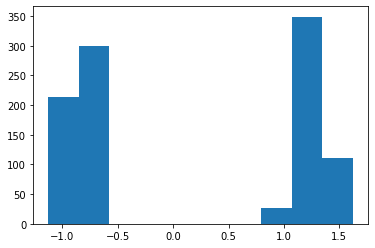

In [174]:
plt.hist(label2[0])
print(np.round(fit_matrix(label),2))

In [230]:
log_likelihood(A, l3)

-0.5598810749104922

In [219]:
l3 = label2.copy()
l3[1] += derivative(1, A, label2)*1000000

In [229]:
l3 = label2.copy()
l3[1] +=.3

(array([  8.,  47., 132., 221., 236., 194.,  93.,  39.,  22.,   8.]),
 array([-1.13379765, -0.86979421, -0.60579078, -0.34178735, -0.07778392,
         0.18621952,  0.45022295,  0.71422638,  0.97822982,  1.24223325,
         1.50623668]),
 <BarContainer object of 10 artists>)

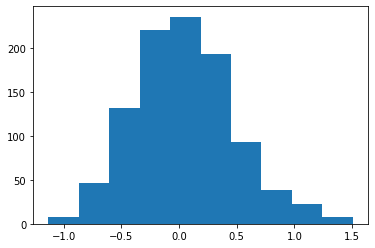

In [231]:
plt.hist(label2[1])

(array([ 10.,  49., 159., 242., 234., 189.,  65.,  35.,  13.,   4.]),
 array([-1.16987225, -0.88389956, -0.59792687, -0.31195417, -0.02598148,
         0.25999121,  0.54596391,  0.8319366 ,  1.11790929,  1.40388198,
         1.68985468]),
 <BarContainer object of 10 artists>)

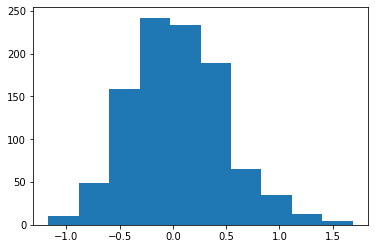

In [221]:
plt.hist(l3[1])

[[0.85 0.25 0.84 ... 0.83 0.24 0.25]
 [0.25 0.68 0.27 ... 0.27 0.67 0.68]
 [0.84 0.27 0.85 ... 0.84 0.23 0.26]
 ...
 [0.83 0.27 0.84 ... 0.83 0.24 0.26]
 [0.24 0.67 0.23 ... 0.24 0.7  0.68]
 [0.25 0.68 0.26 ... 0.26 0.68 0.68]]


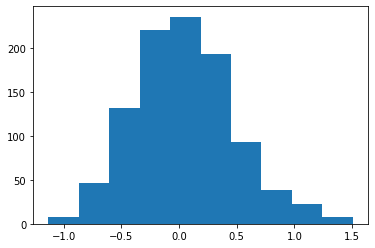

In [176]:
plt.hist(label2[1])
print(np.round(fit_matrix(label),2))

In [102]:
all_derivative(A, np.random.logistic(size=2*n).reshape(2,n))

array([[-0.02658478,  0.0099557 , -0.01941691, -0.02014318, -0.03106333,
        -0.01578834, -0.01867852, -0.02126824,  0.0035456 ,  0.01181752,
         0.0084247 ,  0.00813746, -0.02528652, -0.013221  , -0.03365429,
        -0.02408116,  0.02282383,  0.03497641,  0.02872671, -0.00502332,
         0.00323734, -0.01488208,  0.03117228, -0.03416274, -0.01202396,
        -0.0036672 , -0.05365466, -0.00133873,  0.03389562,  0.02636985],
       [ 0.02346472,  0.03320646, -0.01052195,  0.03987987, -0.00538925,
        -0.01125729, -0.01532965,  0.03320141, -0.00867105,  0.00227716,
        -0.02778078, -0.03292439,  0.0075637 , -0.01113081, -0.02206904,
        -0.01794987, -0.00866068, -0.03056635,  0.01147847,  0.01653652,
        -0.01759405, -0.02672387, -0.01849641,  0.0019799 , -0.023964  ,
         0.02464421,  0.01391114, -0.04547926, -0.0014853 ,  0.02073839]])

In [156]:
all_derivative(A, label)

array([[-5.18484833e-07,  1.22141358e-06,  5.28505003e-06, ...,
         2.68515982e-06, -4.03577394e-06,  3.07309964e-06],
       [ 8.66883210e-07, -1.80138410e-06, -8.69949885e-06, ...,
        -4.41812600e-06,  5.72779082e-06, -4.21503588e-06]])

(array([  1.,   0.,   8.,  36., 133., 312., 300., 160.,  40.,  10.]),
 array([-6.91482122e-06, -5.76299474e-06, -4.61116826e-06, -3.45934178e-06,
        -2.30751530e-06, -1.15568882e-06, -3.86233681e-09,  1.14796414e-06,
         2.29979063e-06,  3.45161711e-06,  4.60344359e-06]),
 <BarContainer object of 10 artists>)

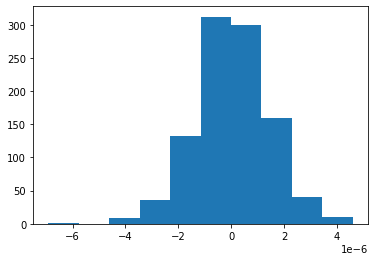

In [177]:
plt.hist(all_derivative(A,label2)[0])

(array([  3.,  17.,  80., 199., 290., 240., 126.,  33.,   9.,   3.]),
 array([-2.81732645e-07, -2.22544956e-07, -1.63357268e-07, -1.04169579e-07,
        -4.49818908e-08,  1.42057976e-08,  7.33934861e-08,  1.32581175e-07,
         1.91768863e-07,  2.50956551e-07,  3.10144240e-07]),
 <BarContainer object of 10 artists>)

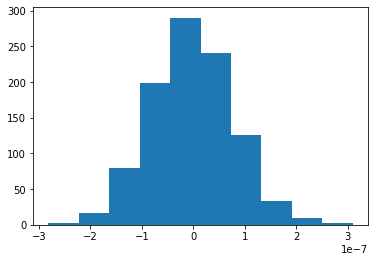

In [178]:
plt.hist(all_derivative(A,label2)[1])

In [127]:
label

array([[-1.14034759,  0.83830993, -1.13559717, -1.25619017,  0.91052005,
         0.7732005 ,  0.99936599,  0.95519239, -1.28919195, -1.16010414,
         0.65674668,  1.17035785, -1.23884888,  1.00785221, -1.35932778,
        -1.19216207, -1.28600259, -1.45602789,  0.80105655, -1.14297082,
         0.84322633, -1.2573177 ,  0.73339008, -1.31218093, -1.41253285,
        -1.32367889, -1.37727896, -1.10401288,  1.03370554, -1.11258112,
         1.1188973 ,  0.83047628, -1.17855275,  0.77926272,  0.82138928,
        -1.36412144,  0.83170106,  0.59703281,  0.68164969, -1.28914368,
         1.02577972, -1.37445841, -1.12987168,  0.87926008,  0.68135253,
         0.87833603, -1.35586192, -1.15817246, -1.284753  ,  1.15226434,
        -1.3200142 ,  0.93014542, -1.03231054, -1.35986086,  0.95029671,
        -1.21740312, -1.11691251,  0.89167432, -1.32647057,  1.14445504,
         0.6951501 ,  0.69376196,  0.85685219,  0.88710531,  0.91066839,
        -1.18942591, -1.50073647, -1.34241185,  1.0

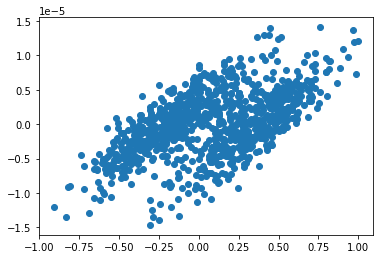

In [161]:
plt.scatter(label[1],(all_derivative(A,label)[1]))

In [283]:
u, s, vh = np.linalg.svd(A)
smat = np.zeros(shape=u.shape, dtype=float)
smat[:2, :2] = np.diag(s)[:2,:2]

In [301]:
vecs = []
for i in range(2):
    #print(i)
    #print(s[i])
    #print((u[[i]]))
    vecs.append(((u[:,[i]]*s[i])@vh[[i]]))

In [343]:
arr = np.array([[1,2],[2,1]])

In [315]:
arr2 = np.array([[1,2,3,4,5]]).T @ np.array([[5,4,3,2,1]])

In [332]:
np.array([[1,2,3,4,5]]).T @ np.array([[5,4,3,2,1]])

array([[ 5,  4,  3,  2,  1],
       [10,  8,  6,  4,  2],
       [15, 12,  9,  6,  3],
       [20, 16, 12,  8,  4],
       [25, 20, 15, 10,  5]])

In [344]:
eig, eiv = np.linalg.eig(arr)

In [347]:
eiv

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [352]:
np.round(eiv@ np.array([[eig[0], 0],[0,0]]) @eiv.T,2) + np.round(eiv@ np.array([[0, 0],[0,eig[1]]]) @eiv.T,2)

array([[1., 2.],
       [2., 1.]])

In [338]:
np.round(eiv[[0]].T @ eiv[[0]]*eig[0],2)

array([[ 0.64+0.j  ,  1.73+0.j  ,  1.46+0.j  ,  0.35-0.54j,  0.35+0.54j],
       [ 1.73+0.j  ,  4.7 +0.j  ,  3.97+0.j  ,  0.96-1.47j,  0.96+1.47j],
       [ 1.46+0.j  ,  3.97+0.j  ,  3.35+0.j  ,  0.81-1.24j,  0.81+1.24j],
       [ 0.35-0.54j,  0.96-1.47j,  0.81-1.24j, -0.27-0.6j ,  0.66+0.j  ],
       [ 0.35+0.54j,  0.96+1.47j,  0.81+1.24j,  0.66+0.j  , -0.27+0.6j ]])

In [353]:
eig, eiv = np.linalg.eig(A)

In [356]:
D = np.zeros(shape=u.shape, dtype=float)
D[:2, :2] = np.diag(eig)[:2,:2]

In [357]:
np.round(eiv@ D @eiv.T,2)

array([[0.79, 0.17, 0.79, ..., 0.78, 0.17, 0.19],
       [0.17, 0.55, 0.18, ..., 0.18, 0.58, 0.59],
       [0.79, 0.18, 0.78, ..., 0.78, 0.17, 0.2 ],
       ...,
       [0.78, 0.18, 0.78, ..., 0.77, 0.18, 0.21],
       [0.17, 0.58, 0.17, ..., 0.18, 0.61, 0.61],
       [0.19, 0.59, 0.2 , ..., 0.21, 0.61, 0.62]])

In [331]:
eig

array([ 3.50000000e+01+0.00000000e+00j,  4.76227873e-16+0.00000000e+00j,
       -8.00626655e-16+0.00000000e+00j, -1.11022302e-16+2.93737402e-16j,
       -1.11022302e-16-2.93737402e-16j])

In [328]:
a

array([[ 0.00000000e+00, -3.26598632e+01,  1.77598015e+01,
        -1.65581320e+00, -4.81467202e+00],
       [ 0.00000000e+00,  3.50000000e+01, -1.90323226e+01,
         1.77445514e+00,  5.15965176e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.99726356e-15,
         1.64082560e-16,  3.10275826e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.77341729e-17, -2.40855569e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.61798966e-16]])

In [322]:
eig.round()

array([35.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.-0.j])

In [314]:
eig[0] * eiv[[0]].T@eiv[[0]] + eig[1] *eiv[[1]].T@eiv[[1]]

array([[ 1.46651196, -2.89170738],
       [-2.89170738,  4.37827667]])

In [302]:
vecs

[array([[0.62448384, 0.39520202, 0.62305355, ..., 0.62429003, 0.40764887,
         0.42936296],
        [0.39520202, 0.25010196, 0.39429686, ..., 0.39507936, 0.2579789 ,
         0.27172057],
        [0.62305355, 0.39429686, 0.62162653, ..., 0.62286018, 0.4067152 ,
         0.42837956],
        ...,
        [0.62429003, 0.39507936, 0.62286018, ..., 0.62409628, 0.40752235,
         0.42922971],
        [0.40764887, 0.2579789 , 0.4067152 , ..., 0.40752235, 0.26610392,
         0.28027839],
        [0.42936296, 0.27172057, 0.42837956, ..., 0.42922971, 0.28027839,
         0.29520788]]),
 array([[ 0.16844126, -0.22486321,  0.16337911, ...,  0.15844709,
         -0.23942075, -0.23530692],
        [-0.22486321,  0.30018454, -0.21810541, ..., -0.21152134,
          0.31961835,  0.31412654],
        [ 0.16337911, -0.21810541,  0.15846909, ...,  0.15368529,
         -0.23222546, -0.22823527],
        ...,
        [ 0.15844709, -0.21152134,  0.15368529, ...,  0.1490459 ,
         -0.22521514, -0

In [296]:
vh[:,[0]]

array([[-3.69960652e-02],
       [ 2.64782263e-02],
       [ 7.47931404e-03],
       [-1.64114396e-02],
       [ 1.23008928e-02],
       [-8.97159514e-03],
       [ 3.88484899e-02],
       [-6.14999175e-03],
       [ 2.41426997e-02],
       [-3.21429105e-03],
       [ 2.65251222e-02],
       [-2.43192797e-02],
       [ 1.93151368e-03],
       [-1.79806343e-02],
       [ 2.26551950e-02],
       [-4.18665848e-02],
       [ 3.63319125e-02],
       [-5.80466560e-03],
       [ 2.34783165e-02],
       [-1.04369151e-02],
       [ 2.50676286e-02],
       [-1.84812567e-02],
       [ 1.11859951e-02],
       [-3.17585389e-02],
       [ 4.08029456e-02],
       [-6.93273461e-03],
       [ 6.18341890e-03],
       [ 1.36672726e-02],
       [-2.31194207e-02],
       [ 4.22855747e-02],
       [-4.07663501e-02],
       [ 7.69999730e-03],
       [ 2.27411202e-03],
       [ 3.30850946e-02],
       [-2.05439616e-03],
       [-3.70325848e-02],
       [ 1.87306303e-02],
       [ 1.35164561e-02],
       [-8.8

In [ ]:
u[]

In [262]:
A_2 = np.dot(u, np.dot(smat, vh))

In [263]:
w, v = np.linalg.eig(A_2)

In [276]:
np.round(w[0]*u[[0]].T@u[[0]] + w[1]*u[[1]].T@u[[1]], 2)

array([[ 0.76+0.j, -0.25+0.j,  0.02+0.j, ..., -0.17+0.j, -0.05+0.j,
        -1.09+0.j],
       [-0.25+0.j,  0.62+0.j, -0.25+0.j, ...,  0.11+0.j, -0.24+0.j,
         0.34+0.j],
       [ 0.02+0.j, -0.25+0.j,  0.11+0.j, ..., -0.03+0.j,  0.11+0.j,
        -0.02+0.j],
       ...,
       [-0.17+0.j,  0.11+0.j, -0.03+0.j, ...,  0.04+0.j, -0.02+0.j,
         0.24+0.j],
       [-0.05+0.j, -0.24+0.j,  0.11+0.j, ..., -0.02+0.j,  0.12+0.j,
         0.08+0.j],
       [-1.09+0.j,  0.34+0.j, -0.02+0.j, ...,  0.24+0.j,  0.08+0.j,
         1.58+0.j]])

In [273]:
u[[0]].T@u[[0]]

array([[ 1.36870884e-03, -9.79590187e-04,  2.76705190e-04, ...,
        -3.57030106e-04,  1.63230620e-04, -1.95512058e-03],
       [-9.79590187e-04,  7.01096469e-04, -1.98038970e-04, ...,
         2.55527822e-04, -1.16824783e-04,  1.39928733e-03],
       [ 2.76705190e-04, -1.98038970e-04,  5.59401385e-05, ...,
        -7.21790350e-05,  3.29995383e-05, -3.95257191e-04],
       ...,
       [-3.57030106e-04,  2.55527822e-04, -7.21790350e-05, ...,
         9.31319306e-05, -4.25789941e-05,  5.09996639e-04],
       [ 1.63230620e-04, -1.16824783e-04,  3.29995383e-05, ...,
        -4.25789941e-05,  1.94666934e-05, -2.33165400e-04],
       [-1.95512058e-03,  1.39928733e-03, -3.95257191e-04, ...,
         5.09996639e-04, -2.33165400e-04,  2.79277547e-03]])

In [258]:
np.round(np.dot(u, np.dot(smat, vh)), 2)

array([[0.79, 0.17, 0.79, ..., 0.78, 0.17, 0.19],
       [0.17, 0.55, 0.18, ..., 0.18, 0.58, 0.59],
       [0.79, 0.18, 0.78, ..., 0.78, 0.17, 0.2 ],
       ...,
       [0.78, 0.18, 0.78, ..., 0.77, 0.18, 0.21],
       [0.17, 0.58, 0.17, ..., 0.18, 0.61, 0.61],
       [0.19, 0.59, 0.2 , ..., 0.21, 0.61, 0.62]])

In [255]:
s

array([4.56257623e+02, 2.40254038e+02, 2.80131784e+01, 2.74053282e+01,
       2.71632306e+01, 2.69675137e+01, 2.68841314e+01, 2.67223808e+01,
       2.66190737e+01, 2.64670482e+01, 2.63949672e+01, 2.63169398e+01,
       2.60906089e+01, 2.60631723e+01, 2.60267934e+01, 2.59703985e+01,
       2.59002551e+01, 2.58646397e+01, 2.57909516e+01, 2.57598244e+01,
       2.57163883e+01, 2.56061726e+01, 2.55101578e+01, 2.54645769e+01,
       2.53850699e+01, 2.52340953e+01, 2.50914292e+01, 2.50778039e+01,
       2.50128856e+01, 2.49341157e+01, 2.48810057e+01, 2.48655652e+01,
       2.47861913e+01, 2.46651067e+01, 2.46645129e+01, 2.46094032e+01,
       2.45778996e+01, 2.45164768e+01, 2.45024929e+01, 2.44690812e+01,
       2.43935912e+01, 2.43926700e+01, 2.43352877e+01, 2.42626291e+01,
       2.42010270e+01, 2.41932223e+01, 2.41107576e+01, 2.40596219e+01,
       2.39786666e+01, 2.38973311e+01, 2.38873535e+01, 2.38375213e+01,
       2.38141632e+01, 2.37870738e+01, 2.37493913e+01, 2.37422237e+01,
      

In [248]:
smat.shape

(1000,)

In [250]:
s

array([4.56257623e+02, 2.40254038e+02, 2.80131784e+01, 2.74053282e+01,
       2.71632306e+01, 2.69675137e+01, 2.68841314e+01, 2.67223808e+01,
       2.66190737e+01, 2.64670482e+01, 2.63949672e+01, 2.63169398e+01,
       2.60906089e+01, 2.60631723e+01, 2.60267934e+01, 2.59703985e+01,
       2.59002551e+01, 2.58646397e+01, 2.57909516e+01, 2.57598244e+01,
       2.57163883e+01, 2.56061726e+01, 2.55101578e+01, 2.54645769e+01,
       2.53850699e+01, 2.52340953e+01, 2.50914292e+01, 2.50778039e+01,
       2.50128856e+01, 2.49341157e+01, 2.48810057e+01, 2.48655652e+01,
       2.47861913e+01, 2.46651067e+01, 2.46645129e+01, 2.46094032e+01,
       2.45778996e+01, 2.45164768e+01, 2.45024929e+01, 2.44690812e+01,
       2.43935912e+01, 2.43926700e+01, 2.43352877e+01, 2.42626291e+01,
       2.42010270e+01, 2.41932223e+01, 2.41107576e+01, 2.40596219e+01,
       2.39786666e+01, 2.38973311e+01, 2.38873535e+01, 2.38375213e+01,
       2.38141632e+01, 2.37870738e+01, 2.37493913e+01, 2.37422237e+01,
      

In [249]:
s.shape

(1000,)

In [253]:
s.shape

(1000,)

In [245]:
np.diag(s)

array([[4.56257623e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.40254038e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.80131784e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.16825951e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.98466452e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.79200772e-04]])

In [239]:
u.shape, s.shape, vh.shape

((1000, 1000), (1000,), (1000, 1000))

In [241]:
np.round(np.dot(u * s, vh))

array([[ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0., -0., ...,  0.,  1.,  0.],
       [ 1., -0.,  0., ...,  0.,  0., -0.],
       ...,
       [ 0.,  0., -0., ..., -0., -0., -0.],
       [-0.,  1., -0., ..., -0., -0.,  0.],
       [ 1., -0.,  0., ...,  0.,  0.,  0.]])

In [242]:
A

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [237]:
u@ s@ vh

array([ 1.80802567e+01, -3.46548448e+01,  1.64424943e+00, -2.59046431e+01,
        2.13268248e+01,  1.88298550e+01, -2.51537173e+01, -1.08990774e+01,
        3.55878726e+01,  5.35974089e-02, -1.26771005e+00, -8.71727035e+00,
        1.22776579e+01,  2.70468763e+01,  8.11697943e+00, -3.67550921e+00,
        1.18090775e+00, -1.11880049e+01, -3.09278691e+01, -2.76554126e+01,
        3.34430141e+01, -2.03445274e+00,  4.00829173e+01,  1.00999021e+00,
       -2.96799872e+00,  5.73875915e+00,  1.79933220e+01, -1.43428499e+01,
        8.49588828e+00,  1.84657351e+00,  2.95093144e+00,  4.20443005e+01,
        5.06291453e+00,  1.42549321e+01, -1.92268046e+01,  2.92277134e+00,
       -1.77221741e+01, -2.17297697e+01, -2.35034679e+01, -1.83635141e+01,
        1.03491165e+01, -1.99028438e+01,  2.86833840e+01,  1.70696366e+01,
       -1.15129448e-01, -1.97364673e+01, -1.42088546e+01, -3.95325254e+01,
        4.14523305e+00,  1.01323950e+01, -1.74771269e+01,  1.85075068e+01,
        3.60794539e+01, -

(array([ 42., 101.,   7.,   0.,   0.,   0.,   0.,   3.,  89.,  58.]),
 array([-1.62566463, -1.34606238, -1.06646013, -0.78685789, -0.50725564,
        -0.22765339,  0.05194886,  0.33155111,  0.61115336,  0.89075561,
         1.17035785]),
 <BarContainer object of 10 artists>)

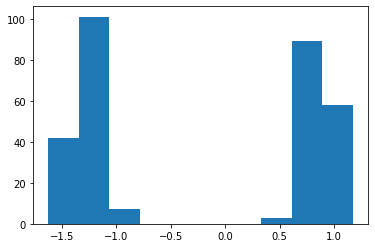

In [126]:
plt.hist(label.flatten())

In [153]:
matrix_log_likelihood(A,T)

-0.5460400968164126

In [114]:
A

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1

In [499]:
A

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [498]:
T

array([[0.8, 0.2, 0.2, ..., 0.8, 0.2, 0.8],
       [0.2, 0.6, 0.6, ..., 0.2, 0.6, 0.2],
       [0.2, 0.6, 0.6, ..., 0.2, 0.6, 0.2],
       ...,
       [0.8, 0.2, 0.2, ..., 0.8, 0.2, 0.8],
       [0.2, 0.6, 0.6, ..., 0.2, 0.6, 0.2],
       [0.8, 0.2, 0.2, ..., 0.8, 0.2, 0.8]])

(array([940.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,  43., 946.]),
 array([-1.4359153 , -1.18976159, -0.94360788, -0.69745417, -0.45130047,
        -0.20514676,  0.04100695,  0.28716065,  0.53331436,  0.77946807,
         1.02562177]),
 <BarContainer object of 10 artists>)

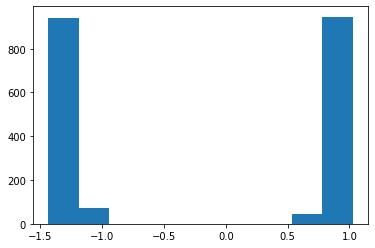

In [496]:
plt.hist(label[1])

In [495]:
all_derivative(A,label)

array([[-6.68260158e-08,  7.65629303e-07,  2.77770827e-07, ...,
        -2.25262006e-07, -1.08965050e-06,  3.03138695e-07],
       [-3.09987359e-10,  4.50841354e-08,  1.24100407e-08, ...,
        -1.14721529e-08, -4.80235383e-08,  1.85285640e-08]])

(array([ 27., 164., 504., 554., 262., 187., 550., 544., 185.,  23.]),
 array([-1.48217242, -1.20984959, -0.93752676, -0.66520394, -0.39288111,
        -0.12055828,  0.15176455,  0.42408738,  0.69641021,  0.96873304,
         1.24105587]),
 <BarContainer object of 10 artists>)

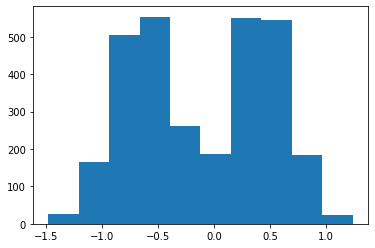

In [473]:
plt.hist(label[1])

In [475]:
label[0][label[0] > 0].mean()

1.1019446737443364

In [478]:
label[1][label[1] < 0].mean()

-0.6198560110024531

In [479]:
label[0][label[0] > 0].mean()

-0.7458044598726068

In [480]:
label[1][label[1] > 0].mean()

0.4489209808313968

In [477]:
label

array([[ 1.08824419,  1.26179565, -0.73379555, ..., -0.76510841,
        -0.64535277, -0.73903841],
       [-0.59078633, -0.32106251,  0.4473523 , ...,  0.38245229,
         0.48884194,  0.49895633]])

In [484]:
sigmoid(.4**2+.6**2)

0.6271477663131956

In [485]:
sigmoid(1.1**2+.6**2)

0.8277836082661223

In [491]:
x = -1
y = .3
z = 1.1
w = -.65

print(sigmoid(x**2+y**2))
print(sigmoid(z**2+w**2))
print(sigmoid(z*x+w*y))

0.7483817216070642
0.8365118259509835
0.21500771137189234


In [450]:
sigmoid(1.26**2)

0.8302781719052836

In [451]:
sigmoid(.83**2)

0.6657221816177943

In [453]:
sigmoid(-1.26*.83)

0.2600324313290248

In [449]:
label[label < 0].mean()

-0.8791452058165522

In [431]:
label = lambda_grad_descent(A, step_size=len(A)/20, num_steps=1000, l = lambda x: x/100)

0 -1.457762452157661
1 -1.4121634841642594
2 -1.3704686982225802
3 -1.331984779949573
4 -1.2961834528169087
5 -1.262676201786927
6 -1.231184988813763
7 -1.2015137629056993
8 -1.173523624059384
9 -1.147112904376313
10 -1.1222023078067749
11 -1.0987245806184915
12 -1.0766178738919985
13 -1.0558218936349706
14 -1.0362760123060855
15 -1.0179186609689062
16 -1.000687483305248
17 -0.9845198823194374
18 -0.9693537144591308
19 -0.9551279807141099
20 -0.9417834322178137
21 -0.9292630535937252
22 -0.9175124159787247
23 -0.9064799081112992
24 -0.8961168620341583
25 -0.8863775928413862
26 -0.8772193716575971
27 -0.8686023491406945
28 -0.8604894441952714
29 -0.8528462098395243
30 -0.8456406855990211
31 -0.8388432435553211
32 -0.8324264333043059
33 -0.8263648295701869
34 -0.8206348850387457
35 -0.8152147900690239
36 -0.810084340265977
37 -0.8052248124014572
38 -0.8006188488170015
39 -0.7962503501960767
40 -0.7921043764287072
41 -0.7881670551866569
42 -0.7844254977662225
43 -0.7808677217257011
44 -0.

349 -0.5463212593393884
350 -0.5462729149954916
351 -0.5462254451996864
352 -0.5461788314013873
353 -0.5461330555559885
354 -0.5460881001060296
355 -0.5460439479632
356 -0.546000582491147
357 -0.5459579874890558
358 -0.5459161471759558
359 -0.54587504617573
360 -0.5458346695027867
361 -0.5457950025483685
362 -0.5457560310674626
363 -0.5457177411662909
364 -0.5456801192903464
365 -0.5456431522129538
366 -0.5456068270243276
367 -0.5455711311211062
368 -0.5455360521963346
369 -0.5455015782298802
370 -0.5454676974792562
371 -0.5454343984708397
372 -0.545401669991453
373 -0.545369501080307
374 -0.545337881021276
375 -0.5453067993354959
376 -0.5452762457742656
377 -0.5452462103122424
378 -0.5452166831409104
379 -0.5451876546623173
380 -0.545159115483057
381 -0.5451310564084962
382 -0.5451034684372273
383 -0.5450763427557377
384 -0.5450496707332884
385 -0.5450234439169858
386 -0.5449976540270466
387 -0.5449722929522389
388 -0.5449473527454934
389 -0.5449228256196809
390 -0.5448987039435419
39

694 -0.5431281886925089
695 -0.5431267243834417
696 -0.5431252651787754
697 -0.5431238110358203
698 -0.5431223619123705
699 -0.5431209177666976
700 -0.543119478557544
701 -0.5431180442441149
702 -0.5431166147860741
703 -0.5431151901435358
704 -0.543113770277059
705 -0.5431123551476408
706 -0.5431109447167128
707 -0.5431095389461306
708 -0.5431081377981719
709 -0.5431067412355307
710 -0.5431053492213075
711 -0.543103961719009
712 -0.5431025786925389
713 -0.5431012001061952
714 -0.5430998259246622
715 -0.5430984561130081
716 -0.5430970906366774
717 -0.5430957294614883
718 -0.5430943725536258
719 -0.5430930198796372
720 -0.5430916714064287
721 -0.5430903271012594
722 -0.5430889869317364
723 -0.5430876508658121
724 -0.5430863188717776
725 -0.5430849909182596
726 -0.5430836669742155
727 -0.54308234700893
728 -0.5430810309920093
729 -0.5430797188933797
730 -0.5430784106832803
731 -0.5430771063322603
732 -0.5430758058111774
733 -0.5430745090911907
734 -0.5430732161437571
735 -0.54307192694063

In [432]:
label[0]@label[1]

0.045745672127050496

(array([  1.,   1.,   1.,  13., 108., 372., 393.,  89.,  19.,   3.]),
 array([-1.56134769, -1.30028354, -1.0392194 , -0.77815525, -0.51709111,
        -0.25602696,  0.00503718,  0.26610133,  0.52716547,  0.78822961,
         1.04929376]),
 <BarContainer object of 10 artists>)

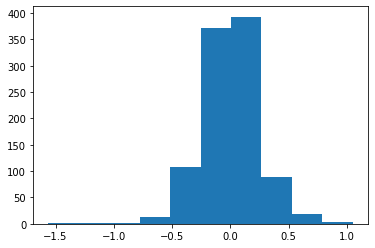

In [437]:
#plt.hist(label[0])
plt.hist(label[1])

In [128]:
np.round(fit_matrix(label),2)

array([[0.79, 0.28, 0.78, ..., 0.27, 0.26, 0.24],
       [0.28, 0.67, 0.28, ..., 0.68, 0.69, 0.7 ],
       [0.78, 0.28, 0.78, ..., 0.27, 0.26, 0.24],
       ...,
       [0.27, 0.68, 0.27, ..., 0.69, 0.7 , 0.71],
       [0.26, 0.69, 0.26, ..., 0.7 , 0.7 , 0.72],
       [0.24, 0.7 , 0.24, ..., 0.71, 0.72, 0.73]])

In [303]:
b = np.array([[1,0,0,1],[0,1,1,0]])
b@b.T

array([[2, 0],
       [0, 2]])

In [409]:
label

array([[-4., -4., -4., ..., -4.,  4.,  4.],
       [-4., -4., -4., ..., -4.,  4., -4.]])

In [237]:
X = np.array(([[-0.32201205,  1.09377148, -4.99817922, -0.68443675, -2.39556086,
        -0.63783134,  0.5669193 , -0.82398457,  2.31086414,  1.7626243 ,
         2.37450341, -2.86840119, -0.79151124, -0.09624591, -1.08464188,
        -1.41776603,  1.12721636, -3.73803856,  0.44315782,  0.46397667],
       [ 1.49263004,  0.80177148, -3.43014822,  0.97735729,  1.80669696,
        -0.04428417, -1.13108515, -0.3633234 , -2.18065873, -0.76111617,
        -2.18376507,  1.79942724,  1.01357068,  4.79051656, -0.25869305,
         1.82149727, -0.27567336, -3.2300958 , -0.04374908, -0.953247  ]]))

In [243]:
np.min(X.T@X)

-15.951127543792534

In [240]:
derivative(0,A,X)

mins 1.1817164367711117e-07 1.0981743964607622e-16
X [[9.11463463e-01 6.99420656e-01 2.90158380e-02 8.42802508e-01
  9.69767229e-01 5.34766182e-01 1.33443804e-01 4.31195683e-01
  1.80031240e-02 1.53989009e-01 1.75642035e-02 9.73648853e-01
  8.54179158e-01 9.99240022e-01 4.90784728e-01 9.59896401e-01
  3.15516062e-01 2.61439788e-02 4.48185841e-01 1.71895704e-01]
 [6.99420656e-01 8.62850936e-01 2.69934595e-04 5.08749058e-01
  2.36559026e-01 3.24504408e-01 4.28789504e-01 2.32802616e-01
  6.85500623e-01 7.88793286e-01 6.99786953e-01 1.55165826e-01
  4.86733026e-01 9.76697777e-01 1.98807685e-01 4.77443449e-01
  7.33389876e-01 1.25626065e-03 6.10552834e-01 4.36150056e-01]
 [2.90158380e-02 2.69934595e-04 1.00000000e+00 5.17107613e-01
  9.96909121e-01 9.65772425e-01 7.40049423e-01 9.95342813e-01
  1.67884944e-02 2.02699693e-03 1.24003129e-02 9.99715497e-01
  6.17610285e-01 1.18171644e-07 9.98182710e-01 6.98095062e-01
  9.11724175e-03 1.00000000e+00 1.12553819e-01 7.21263964e-01]
 [8.42802508e-

<ipython-input-239-4e996d08a018>:15: RuntimeWarning: divide by zero encountered in true_divide
  complement_errs = -np.divide(X_prime,1-X)* labels[[row]].T[:None]
<ipython-input-239-4e996d08a018>:16: RuntimeWarning: invalid value encountered in multiply
  deriv_errs = np.multiply(sample, sample_errs) + np.multiply(sample_complement, complement_errs)


array([-1.91287936e-02,  2.91928136e-03,             nan, -7.46746603e-03,
       -2.59984659e-02,  5.33388518e-02, -1.74129104e-04,  1.32825317e-02,
        4.63165085e-02, -1.31315079e-02,  8.23514952e-02, -9.54877148e-02,
        4.06325760e-03,  1.03503565e-01,  9.52427295e-03,  2.82853916e-03,
       -4.15710968e-02, -2.34470138e-01, -2.81197523e-02,  9.27382438e-04])

In [255]:
true_labels = np.random.randint(2,size=30)

n = 30
G = create_graph(n, true_labels, basic_func)

In [153]:
derivative(0,M, np.array([[0,0,1,1,0,0,0,0]]))

array([ 0.        , -2.        , -1.46211716, -1.46211716,  0.        ,
        2.        ,  0.        ,  2.        ])

In [136]:
arr = np.array([[1,1,0,0,0,0,0,0]])

np.divide(sigmoid_prime(arr.T@arr),fit_matrix(arr))*arr[[0]].T[:None]

array([[0.26894142, 0.26894142, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.26894142, 0.26894142, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [131]:
arr[0]

array([1, 1, 0, 0, 0, 0, 0, 0])

In [128]:
sigmoid_prime(arr.T@arr)

array([[0.19661193, 0.19661193, 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.19661193, 0.19661193, 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ]])

In [129]:
fit_matrix(arr)

array([[0.73105858, 0.73105858, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.73105858, 0.73105858, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       ]])

In [140]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1.0001,1,0,0,0,0,0,0]])))/.0001


-0.5378631818331314

In [142]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1,1.0001,0,0,0,0,0,0]])))/.0001




-0.5378631818331314

In [143]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1,1,0.0001,0,0,0,0,0]])))/.0001


2.0000499999639487

In [145]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1,1,0,0.0001,0,0,0,0]])))/.0001

5.000003966415534e-05

In [146]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1,1,0,0,0.0001,0,0,0]])))/.0001



-1.9999499999556747

In [98]:
(log_likelihood(M, np.array([[1,1,0,0,0,0,0,0,0,0]]))-log_likelihood(M, np.array([[1,1.,0,0,0,0,0.0001,0,0,0]])))/.0001



-1.9999499999556747

In [100]:
(np.array([[1,2,3,4],[1,1,1,1]])).T @ np.array([[1,2,3,4],[1,1,1,1]]) *np.array([[-1,2,-1,4]]).T[:None]

array([[ -2,  -3,  -4,  -5],
       [  6,  10,  14,  18],
       [ -4,  -7, -10, -13],
       [ 20,  36,  52,  68]])

In [101]:
np.divide(np.array([[1,1],[2,2]]),np.array([[.5,1],[5,2]]))

array([[2. , 1. ],
       [0.4, 1. ]])

In [98]:
basic_func3(.2,.5)

0.3

# Non SBM solution

In [114]:
true_labels = np.random.rand(1000)

n = 1000
G = create_graph(n, true_labels, basic_func3)
A = nx.to_numpy_array(G)
T = create_transition_matrix(true_labels, basic_func3)

In [115]:
T

array([[0.01      , 0.33647696, 0.04100389, ..., 0.15636537, 0.11473568,
        0.01600321],
       [0.33647696, 0.01      , 0.37748085, ..., 0.18011159, 0.45121264,
        0.35248017],
       [0.04100389, 0.37748085, 0.01      , ..., 0.19736926, 0.07373179,
        0.02500068],
       ...,
       [0.15636537, 0.18011159, 0.19736926, ..., 0.01      , 0.27110105,
        0.17236858],
       [0.11473568, 0.45121264, 0.07373179, ..., 0.27110105, 0.01      ,
        0.09873246],
       [0.01600321, 0.35248017, 0.02500068, ..., 0.17236858, 0.09873246,
        0.01      ]])

In [116]:
matrix_log_likelihood(A,T)

-0.49954918475219373

In [163]:
def get_labels(A, num_labels=2):
    vals, vecs = scp.linalg.eig(A)
        
    D = np.zeros(shape=(A.shape), dtype=float)
    D[:num_labels, :num_labels] = np.diag(vals.real)[:num_labels,:num_labels]
    
    labels = []
    print(vecs.T[1]*(D[1][1]))
    for i in range(num_labels):
        print(D[i][i])
        labels.append(vecs.T[i]*np.sqrt(D.astype('complex128')[i][i]))
        print(i)
    return np.array(labels)
    
    #matrix_log_likelihood(A, sigmoid(vecs@ D @ vecs.T))

In [166]:
L = get_labels(inv_sigmoid(T))

[ 2.06689088e+01  5.09371799e+01  1.44269708e+01  1.94850708e+01
 -3.86311494e+01  3.94835584e+01 -5.17118011e+01  2.80985968e+01
  2.62829194e+01  1.01396297e+01  1.96751397e+01 -4.98985174e+01
 -2.97564038e+01  4.85591380e+01  4.98274804e+01  6.96452529e+00
  4.18460306e+01 -3.77318266e+01  4.93580363e+01  4.17009592e+01
  4.98421202e+01 -3.49193568e+01  4.94552826e+01  5.36160506e+00
  4.17319247e+01 -5.01356513e+01  3.05022804e+01  3.03337024e+01
 -2.69719182e+01 -5.14047392e+01  5.64757607e+00 -3.10424446e+01
 -3.93974607e+01  5.03249504e+01 -4.09135633e+01 -5.14613009e+01
 -5.16358414e+01  4.89419757e+01  4.10582394e+01  2.30020723e+01
 -4.61033037e+01 -2.38738235e+01 -4.30021213e+01 -1.57905169e+01
  3.20077478e+01 -6.32450353e+00 -2.04286967e+01  3.37277940e+01
 -1.52221256e+01 -1.29673644e+01 -2.59084412e+01 -1.16672910e+01
 -3.48483382e+01  3.52018240e+01 -1.90917403e+01 -3.51611231e+01
  2.20065095e+01 -5.20566204e+01 -2.82986483e+01 -4.87175109e+01
 -7.21383025e+00  2.96912

In [145]:
1207**.5

34.741905532080416

In [177]:
vals, vecs = scp.linalg.eig(inv_sigmoid(T))
        
D = np.zeros(shape=(A.shape), dtype=float)
D[:2, :2] = np.diag(vals.real)[:2,:2]
matrix_log_likelihood(A, sigmoid(vecs@ D @ vecs.T))

-0.5157795519826068

In [128]:
vecs

array([[-4.19597932e-02, -1.78503998e-02,  2.90803159e-02, ...,
        -2.14526252e-07, -1.22388583e-08,  8.65212292e-09],
       [-4.73775191e-03, -4.39911480e-02, -3.30637841e-02, ...,
        -1.11582498e-07,  1.83973694e-06, -6.33027088e-04],
       [-4.40371089e-02, -1.24596416e-02,  3.87351588e-02, ...,
        -7.84284645e-08, -1.27892078e-08,  3.41474615e-08],
       ...,
       [-2.69819640e-02, -3.40333061e-02, -3.03877893e-02, ...,
         8.78211037e-08,  6.00835596e-08,  8.03250494e-07],
       [-4.56169827e-02, -2.08576011e-03,  4.00152271e-02, ...,
        -1.20877854e-07,  2.92885903e-08,  4.07448131e-07],
       [-4.32211237e-02, -1.59156585e-02,  3.45435608e-02, ...,
        -7.00961888e-08,  1.06573145e-08,  1.06292976e-08]])

In [121]:
true_labels[5]

0.8139737607545723

In [122]:
true_labels[6]

0.06532312375083915

In [123]:
true_labels[7]

0.7101212372629002

In [167]:
L[:,5]

array([-0.-0.93135158j, -0.-1.1603299j ])

In [168]:
L[:,6]

array([-0.-0.17361938j,  0.+1.5196895j ])

In [169]:
L[:,7]

array([-0.-1.31410245j, -0.-0.82575237j])

In [130]:
D@(vecs.T)

array([[50.6644633 ,  5.72061108, 53.17272364, ..., 32.57944377,
        55.08034649, 52.18746023],
       [20.66890879, 50.93717991, 14.42697078, ..., 39.40703341,
         2.41509355, 18.42867939],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [131]:
vecs@D

array([[50.6644633 , 20.66890879,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.72061108, 50.93717991,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [53.17272364, 14.42697078,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [32.57944377, 39.40703341,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [55.08034649,  2.41509355,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [52.18746023, 18.42867939,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
np.max(A-A.T)

0.0

In [170]:
M = projection_descent(A, step_size=.01, steps=40)

<ipython-input-86-42912169b5ff>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  D[:2, :2] = np.diag(vals)[:2,:2]


0 -0.6273597294031458
1 -0.5873019974502053
2 -0.5620729938945636
3 -0.5457580679666879
4 -0.5349412535785854
5 -0.5276108936146238
6 -0.5225497398723393
7 -0.5190001888106162
8 -0.5164780466809396
9 -0.5146663757490058
10 -0.5133532961555194
11 -0.5123945270494531
12 -0.5116902333252422
13 -0.5111703683249668
14 -0.5107851913631312
15 -0.5104990119816553
16 -0.510285989967308
17 -0.5101272710373262
18 -0.5100090059195745
19 -0.5099209631929201
20 -0.5098555470720547
21 -0.5098070950210987
22 -0.5097713710445267
23 -0.5097451972801442
24 -0.5097261842863242
25 -0.5097125323700937
26 -0.5097028844492201
27 -0.5096962165587634
28 -0.5096917560279742
29 -0.509688920109738
30 -0.5096872698029015
31 -0.5096864750105065
32 -0.5096862881894599
33 -0.5096865243830965
34 -0.5096870460664213
35 -0.5096877516298536
36 -0.5096885666201825
37 -0.5096894370750902
38 -0.5096903244500158
39 -0.5096912017578086


In [184]:
M = projection_descent(A, step_size=.008, steps=100, params=4)

0 -0.6367852851745918
1 -0.599115144949257
2 -0.5732134797499291
3 -0.5550506674072054
4 -0.5420566562218392
5 -0.532581664371211
6 -0.5255501319202583
7 -0.5202475856660066
8 -0.5161901804826827
9 -0.5130441163527276
10 -0.5105750743905257
11 -0.5086159072315224
12 -0.5070456065644987
13 -0.5057753632160419
14 -0.5047391701430929
15 -0.5038873873113274
16 -0.5031822703643088
17 -0.502594821887607
18 -0.5021025464448069
19 -0.501687831512331
20 -0.5013367672599687
21 -0.5010382775576862
22 -0.5007834740519144
23 -0.5005651717127702
24 -0.500377522352271
25 -0.5002157350906866
26 -0.5000758614423918
27 -0.4999546288111579
28 -0.49984931053064663
29 -0.499757623699187
30 -0.4996776483062986
31 -0.4996077627845802
32 -0.4995465923197796
33 -0.4994929671369599
34 -0.4994458886381752
35 -0.4994045017587752
36 -0.4993680722793664
37 -0.49933596811050524
38 -0.49930764378049836
39 -0.4992826275200652
40 -0.4992605104635416
41 -0.4992409375838873
42 -0.4992236000548345
43 -0.49920822879313004


In [185]:
np.round(sigmoid(M),2)

array([[0.02, 0.4 , 0.04, ..., 0.09, 0.04, 0.03],
       [0.4 , 0.05, 0.42, ..., 0.11, 0.53, 0.37],
       [0.04, 0.42, 0.05, ..., 0.16, 0.05, 0.05],
       ...,
       [0.09, 0.11, 0.16, ..., 0.04, 0.24, 0.12],
       [0.04, 0.53, 0.05, ..., 0.24, 0.04, 0.05],
       [0.03, 0.37, 0.05, ..., 0.12, 0.05, 0.05]])

(array([8.60000e+01, 1.02600e+03, 1.22000e+04, 1.25390e+05, 3.82214e+05,
        3.57420e+05, 1.09339e+05, 1.12870e+04, 1.00000e+03, 3.80000e+01]),
 array([-0.25878149, -0.20650925, -0.15423702, -0.10196479, -0.04969256,
         0.00257967,  0.05485191,  0.10712414,  0.15939637,  0.2116686 ,
         0.26394083]),
 <BarContainer object of 10 artists>)

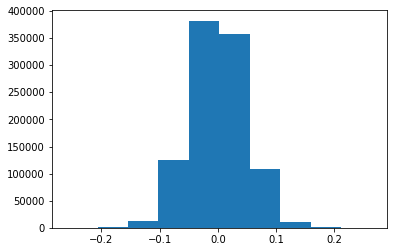

In [190]:
plt.hist((sigmoid(M)-T).flatten())

In [191]:
np.sum(((sigmoid(M)-T).flatten())**2)/len(M)**2

0.0021911081341016523

In [186]:
T

array([[0.01      , 0.33647696, 0.04100389, ..., 0.15636537, 0.11473568,
        0.01600321],
       [0.33647696, 0.01      , 0.37748085, ..., 0.18011159, 0.45121264,
        0.35248017],
       [0.04100389, 0.37748085, 0.01      , ..., 0.19736926, 0.07373179,
        0.02500068],
       ...,
       [0.15636537, 0.18011159, 0.19736926, ..., 0.01      , 0.27110105,
        0.17236858],
       [0.11473568, 0.45121264, 0.07373179, ..., 0.27110105, 0.01      ,
        0.09873246],
       [0.01600321, 0.35248017, 0.02500068, ..., 0.17236858, 0.09873246,
        0.01      ]])

In [172]:
matrix_log_likelihood(A, T)

-0.49954918475219373

In [193]:
true_labels[0]

0.656297106120659

In [195]:
label_hat = get_labels(A,num_labels=4)

[ 3.96135916  8.86325421  3.55688178  4.48493169 -5.97567965  7.66529385
 -8.34487014  5.75885419  5.35020331  2.5187964   4.17164325 -7.8707837
 -3.87511116  9.3951048   8.53753799  1.60052861  8.22316411 -6.10977353
  8.66822266  8.30740092  9.37683899 -5.46100158  8.50034891  2.29409857
  7.37891814 -7.84443186  6.64569625  5.9091349  -3.57729576 -8.62955845
  2.4871053  -3.99640809 -5.83688368  8.84408208 -5.70851573 -9.0333381
 -9.03468535  8.44979072  8.66263956  5.0875102  -7.2417899  -3.04481492
 -8.04046763 -1.26696945  6.53526026 -0.41191921 -2.55943576  6.72184603
 -1.80131703 -1.60129213 -4.27523134 -1.1911044  -5.00762028  6.54218731
 -2.97326628 -5.94538371  4.79796255 -8.39925001 -3.85566664 -7.30132006
  0.9997251   5.98389951  8.70070604  7.14952458  7.45958367  0.13811607
  2.31920397 -8.49265434  4.64234506 -8.04510829 -0.76783337 -5.77755077
  2.58922964 -2.3447726  -3.22396277  9.0582914   5.97275171  7.97328118
 -8.91836482 -1.98485355  5.54289736  3.68405845  6.5

In [198]:
label_hat[:,[0]]

array([[ 0.45220424+0.j        ],
       [-0.        -0.28051499j],
       [-0.        -0.25685482j],
       [ 0.        +0.27052557j]])

In [200]:
np.linalg.norm(label_hat[:,[0]])

0.6498736925386727

In [202]:
true_distances = []
hat_distances= []
for i in range(1,len(A)):
    true_distances.append(abs(true_labels[0]-true_labels[i]))
    hat_distances.append(np.linalg.norm(label_hat[:,[0]]-label_hat[:,[i]]))

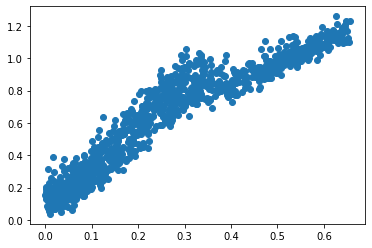

In [205]:
plt.scatter(true_distances,hat_distances)

In [212]:
true_labels = np.random.rand(500)

n = 500
G = create_graph(n, true_labels, basic_func4)
A = nx.to_numpy_array(G)
T = create_transition_matrix(true_labels, basic_func4)

In [213]:
vals, vecs = scp.linalg.eig(T)

In [214]:
vals

array([ 9.56665419e+01+0.00000000e+00j, -8.12810732e+01+0.00000000e+00j,
       -1.43554687e+01+0.00000000e+00j,  1.00000000e-02+0.00000000e+00j,
        1.00000000e-02+0.00000000e+00j,  1.00000000e-02+3.67593758e-15j,
        1.00000000e-02-3.67593758e-15j,  1.00000000e-02+2.84469686e-15j,
        1.00000000e-02-2.84469686e-15j,  1.00000000e-02+3.52944785e-15j,
        1.00000000e-02-3.52944785e-15j,  1.00000000e-02+1.46774829e-15j,
        1.00000000e-02-1.46774829e-15j,  1.00000000e-02+1.03107305e-15j,
        1.00000000e-02-1.03107305e-15j,  1.00000000e-02+0.00000000e+00j,
        1.00000000e-02+2.65347391e-15j,  1.00000000e-02-2.65347391e-15j,
        1.00000000e-02+1.81590222e-15j,  1.00000000e-02-1.81590222e-15j,
        1.00000000e-02+1.65630133e-15j,  1.00000000e-02-1.65630133e-15j,
        1.00000000e-02+6.89585857e-16j,  1.00000000e-02-6.89585857e-16j,
        1.00000000e-02+2.94674681e-15j,  1.00000000e-02-2.94674681e-15j,
        1.00000000e-02+2.31471142e-15j,  1.00000000